## **Tema 1**
Analiza exploratorie a datelor pentru oferte de vânzări auto
Mineritul datelor și analiza datelor (MDAD)


Permitem accesul la Google Drive din acest notebook din Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




---


Navigam in folderul corespunzator.



In [ ]:

%cd /content/drive/My Drive/master/dmda/

/content/drive/My Drive/master/dmda




---


Verificam daca am ajuns in folderul corect.

In [ ]:
%pwd

'/content/drive/My Drive/master/dmda'

In [ ]:
%ls

assignment1.ipynb  tema-1-dmda-24.json




---


###Librariile folosite

In urmatorul cell o sa fie adaugate toate librariile folosite pentru prelucrarea dataset-ului.

In [ ]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt



---


Citirea fisierului json si convertirea acestora intr-un dataframe de pandas. Ne folosim de pandas datorita gamei diverse de metode pe care ni le pune la dispozitie pentru prelucrarea datelor.

In [ ]:
dataset_path = './tema-1-dmda-24.json'

with open(dataset_path) as f:
  json_data = json.load(f)

df = pd.json_normalize(json_data)



---


Afisam cateva date pentru a ne asigura ca s-au incarcat corect.

In [ ]:
df.head()

id                 data  \
0  7053131628  2024-03-06 11:49:00   
1  7053116553  2024-03-06 11:37:00   
2  7052796079  2024-03-06 11:38:00   
3  7052933182  2024-03-06 11:37:00   
4  7053100111  2024-03-06 11:37:00   

                                                nume     pret  \
0  Volkswagen Tiguan 2.0 TDI 4Motion DSG Sport & ...   9999.0   
1                                         Opel Astra   3150.0   
2                                     Renault Megane  12495.0   
3                                       Dacia Duster  17790.0   
4                      BMW X4 xDrive20d Aut. M Sport  24990.0   

                                                 url Oferit de  \
0  https://www.autovit.ro/autoturisme/anunt/volks...     Firma   
1  https://www.autovit.ro/autoturisme/anunt/opel-...     Firma   
2  https://www.autovit.ro/autoturisme/anunt/renau...     Firma   
3  https://www.autovit.ro/autoturisme/anunt/dacia...     Firma   
4  https://www.autovit.ro/autoturisme/anunt/bmw-x...     Firma   

  Are VIN (Serie sasiu)       Marca   Model  \
0                    Da  Volkswagen  Tiguan   
1                   NaN        Opel   Astra   
2                   NaN     Renault  Megane   
3                    Da       Dacia  Duster   
4                    Da         BMW      X4   

                            Versiune  ...  Predare leasing  \
0  2.0 TDI 4Motion DSG Sport & Style  ...              NaN   
1                                NaN  ...              NaN   
2                                NaN  ...              NaN   
3                                NaN  ...              NaN   
4             xDrive20d Aut. M Sport  ...              NaN   

   Plata initiala (la predare) Autonomie  Consum mediu  Capacitate baterie  \
0                          NaN       NaN           NaN                 NaN   
1                          NaN       NaN           NaN                 NaN   
2                          NaN       NaN           NaN                 NaN   
3                          NaN       NaN           NaN                 NaN   
4                          NaN       NaN           NaN                 NaN   

  Valoare rata lunara  Timp de incarcare Numar de rate lunare ramase  \
0                 NaN                NaN                         NaN   
1                 NaN                NaN                         NaN   
2                 NaN                NaN                         NaN   
3                 NaN                NaN                         NaN   
4                 NaN                NaN                         NaN   

   Valoare reziduala Consum Mixt  
0                NaN         NaN  
1                NaN         NaN  
2                NaN         NaN  
3                NaN         NaN  
4                NaN         NaN  

[5 rows x 60 columns]

Putem observa intr-o prima instanta ca datasetul contine date specifice anunturilor de vanzari auto. Pentru a intelege mai bine ce pune la dispozitie, putem afisa coloanele datasetului.

In [ ]:
df.columns

Index(['id', 'data', 'nume', 'pret', 'url', 'Oferit de',
       'Are VIN (Serie sasiu)', 'Marca', 'Model', 'Versiune',
       'Anul fabricației', 'Km', 'Combustibil', 'Putere',
       'Capacitate cilindrica', 'Transmisie', 'Consum Extraurban',
       'Cutie de viteze', 'Consum Urban', 'Tip Caroserie', 'Emisii CO2',
       'Numar de portiere', 'Culoare', 'Numar locuri', 'Se emite factura',
       'Eligibil pentru finantare', 'sau in limita a',
       'Garantie dealer (inclusa in pret)', 'Primul proprietar (de nou)',
       'Fara accident in istoric', 'Carte de service', 'Stare',
       'VIN (serie sasiu)', 'Audio si tehnologie',
       'Confort si echipamente optionale',
       'Electronice si sisteme de asistenta', 'Siguranta', 'Generatie',
       'Norma de poluare', 'Optiuni culoare', 'Tara de origine',
       'Data primei inmatriculari', 'Performanta',
       'Garantie de la producator pana la', 'Vehicule electrice',
       'Inmatriculat', 'Tuning', 'Contract baterie', 'Masina de epo

In [ ]:
print(df.columns.tolist())

['id', 'data', 'nume', 'pret', 'url', 'Oferit de', 'Are VIN (Serie sasiu)', 'Marca', 'Model', 'Versiune', 'Anul fabricației', 'Km', 'Combustibil', 'Putere', 'Capacitate cilindrica', 'Transmisie', 'Consum Extraurban', 'Cutie de viteze', 'Consum Urban', 'Tip Caroserie', 'Emisii CO2', 'Numar de portiere', 'Culoare', 'Numar locuri', 'Se emite factura', 'Eligibil pentru finantare', 'sau in limita a', 'Garantie dealer (inclusa in pret)', 'Primul proprietar (de nou)', 'Fara accident in istoric', 'Carte de service', 'Stare', 'VIN (serie sasiu)', 'Audio si tehnologie', 'Confort si echipamente optionale', 'Electronice si sisteme de asistenta', 'Siguranta', 'Generatie', 'Norma de poluare', 'Optiuni culoare', 'Tara de origine', 'Data primei inmatriculari', 'Performanta', 'Garantie de la producator pana la', 'Vehicule electrice', 'Inmatriculat', 'Tuning', 'Contract baterie', 'Masina de epoca', 'Volan pe dreapta', 'Predare leasing', 'Plata initiala (la predare)', 'Autonomie', 'Consum mediu', 'Capaci

In [ ]:
len(df.columns.tolist())

60

Vazand coloanele setului de date, este destul de clar ca acesta contine toate datele specifice anunturilor de vanzari auto. Acum intrebarea este, ce ne-ar interesa cel mai mult? Ce incercam sa obtinem din prelucrarea acestui dataset?


Eu o sa merg pe ideea influentei componentelor din anunt asupra pretului de listare al unei masini in anunt. Pornind de la aceasta idee, voi putea decide ce coloane ne intereseaza, care influenteaza pretul masinii si care nu.



---


Pana la a decide ce conteaza si ce nu, trebuie sa vedem ce tip de date contin coloanele setului de date.

In [ ]:
df.dtypes.value_counts()

object     48
float64    11
int64       1
Name: count, dtype: int64

Cel mai usor de analizat ar fi fost ca mare parte din date sa aiba valori numerice. Din pacate, nu este cazul aici. Majoritatea datelor sunt de tipul obiect.



---


Coloanele cu tipul de date obiect sunt:

In [ ]:
df.select_dtypes('object').columns

Index(['id', 'data', 'nume', 'url', 'Oferit de', 'Are VIN (Serie sasiu)',
       'Marca', 'Model', 'Versiune', 'Combustibil', 'Transmisie',
       'Cutie de viteze', 'Tip Caroserie', 'Culoare', 'Se emite factura',
       'Eligibil pentru finantare', 'Garantie dealer (inclusa in pret)',
       'Primul proprietar (de nou)', 'Fara accident in istoric',
       'Carte de service', 'Stare', 'VIN (serie sasiu)', 'Audio si tehnologie',
       'Confort si echipamente optionale',
       'Electronice si sisteme de asistenta', 'Siguranta', 'Generatie',
       'Norma de poluare', 'Optiuni culoare', 'Tara de origine',
       'Data primei inmatriculari', 'Performanta',
       'Garantie de la producator pana la', 'Vehicule electrice',
       'Inmatriculat', 'Tuning', 'Contract baterie', 'Masina de epoca',
       'Volan pe dreapta', 'Predare leasing', 'Plata initiala (la predare)',
       'Autonomie', 'Consum mediu', 'Capacitate baterie',
       'Valoare rata lunara', 'Timp de incarcare', 'Valoare rezi

Sa vedem valorile unice ale coloanelor cu tipul de date obiect:

In [ ]:
for col in df.select_dtypes('object').columns:
    print(col, df[col].unique())

id ['7053131628' '7053116553' '7052796079' ... '7052229020' '7053209543'
 '7052947229']
data ['2024-03-06 11:49:00' '2024-03-06 11:37:00' '2024-03-06 11:38:00' ...
 '2024-03-06 08:09:00' '2024-03-06 08:45:00' '2024-03-06 08:55:00']
nume ['Volkswagen Tiguan 2.0 TDI 4Motion DSG Sport & Style' 'Opel Astra'
 'Renault Megane' ... 'Volkswagen Touareg 3.0 V6 TDI DPF Aut. Mountain'
 'Mazda 2 1.3i CE Plus' 'Lexus Seria RX 450h AWD Executive Sport Edition']
url ['https://www.autovit.ro/autoturisme/anunt/volkswagen-tiguan-2-0-tdi-4motion-dsg-sport-style-ID7HkdJy.html'
 'https://www.autovit.ro/autoturisme/anunt/opel-astra-ID7Hk9Op.html'
 'https://www.autovit.ro/autoturisme/anunt/renault-megane-ID7HiOrt.html'
 ...
 'https://www.autovit.ro/autoturisme/anunt/mercedes-benz-c-ID7HgqWm.html'
 'https://www.autovit.ro/autoturisme/anunt/mercedes-benz-glc-300-e-4matic-ID7Hky0f.html'
 'https://www.autovit.ro/autoturisme/anunt/nissan-qashqai-ID7HjrLn.html']
Oferit de ['Firma' 'Privat']
Are VIN (Serie sasiu) [

TypeError: unhashable type: 'list'

Prin aceasta eroare putem observa ca exista coloane ce contin liste de elemente.

Sa afisam doar valorile unice ale coloanelor ce nu contin liste de elemente:

In [ ]:
for col in df.select_dtypes('object').columns:
   try:
      if not isinstance(df[col].iloc[0], list):
          print(col, df[col].unique())
   except:
        print(f'{col}: [Listă de valori, tratată separat]')


id ['7053131628' '7053116553' '7052796079' ... '7052229020' '7053209543'
 '7052947229']
data ['2024-03-06 11:49:00' '2024-03-06 11:37:00' '2024-03-06 11:38:00' ...
 '2024-03-06 08:09:00' '2024-03-06 08:45:00' '2024-03-06 08:55:00']
nume ['Volkswagen Tiguan 2.0 TDI 4Motion DSG Sport & Style' 'Opel Astra'
 'Renault Megane' ... 'Volkswagen Touareg 3.0 V6 TDI DPF Aut. Mountain'
 'Mazda 2 1.3i CE Plus' 'Lexus Seria RX 450h AWD Executive Sport Edition']
url ['https://www.autovit.ro/autoturisme/anunt/volkswagen-tiguan-2-0-tdi-4motion-dsg-sport-style-ID7HkdJy.html'
 'https://www.autovit.ro/autoturisme/anunt/opel-astra-ID7Hk9Op.html'
 'https://www.autovit.ro/autoturisme/anunt/renault-megane-ID7HiOrt.html'
 ...
 'https://www.autovit.ro/autoturisme/anunt/mercedes-benz-c-ID7HgqWm.html'
 'https://www.autovit.ro/autoturisme/anunt/mercedes-benz-glc-300-e-4matic-ID7Hky0f.html'
 'https://www.autovit.ro/autoturisme/anunt/nissan-qashqai-ID7HjrLn.html']
Oferit de ['Firma' 'Privat']
Are VIN (Serie sasiu) [

Sa afisam doar coloanele cu liste de obiecte:


In [ ]:
for col in df.select_dtypes('object').columns:
    if isinstance(df[col].iloc[0], list):
        unique_elements = set()

        for lista in df[col].dropna():
            unique_elements.update(lista)

        print(f'{col}: {list(unique_elements)}')
    else:
      try:
        # daca da eroare inseamna ca ar contine o lista de obiecte
        # fara acest try catch, am fi ratat coloana vehicule electrice
        a = df[col].unique()
      except:
        unique_elements = set()

        for lista in df[col].dropna():
            unique_elements.update(lista)

        print(f'{col}: {list(unique_elements)}')


Audio si tehnologie: ['Apple Carplay', 'Android Auto', 'Sistem audio', 'Radio', 'Port USB', 'Conexiune Internet', 'Head up display', 'Bluetooth', 'Sistem navigatie', 'Sistem hands-free', 'Control vocal', 'Wireless charging', 'Monitor cu touch screen']
Confort si echipamente optionale: ['Schimbator viteze piele', 'Aer conditionat', 'Jaluzele electrice geamuri spate', 'Scaune spate ventilate', 'Incalzire scaun pasager', 'Geamuri electrice fata', 'Trapa sticla electrica spate', 'Cotiera (spate)', 'Volan reglabil electric', 'Top stofa', 'Suport lombar electric scaun sofer', 'Geamuri electrice spate', 'Stergatoare parbriz', 'Top cu telecomanda', 'Pornire motor Keyless', 'Climatizare spate', 'Incalzire scaune spate', 'Scaune fata ventilate', 'Tapiterie piele', 'Climatronic 2 zone', 'Incalzire cu reglare automata', 'Carlig remorcare', 'Senzor ploaie', 'Privacy glass', 'Scaun sofer ajustabil electric', 'Suport lombar electric scaun pasager', 'Trapa manuala', 'Top material plastic', 'Climatroni

Pentru aceste ultime coloane, trebuie decisa importanta acestora in raport cu pretul masinii si poate vor trebui adaptate cumva, incat sa se poata face mai usor legaturile. Vom reveni mai tarziu asupra lor.

O prima concluzie asupra coloanelor de tipul obiect: exista foarte multe valori distincte.



---



Acum acelasi lucru pentru coloanele numerice:

In [ ]:
df.select_dtypes('int64').columns

Index(['Anul fabricației'], dtype='object')

In [ ]:
df.select_dtypes('float64').columns

Index(['pret', 'Km', 'Putere', 'Capacitate cilindrica', 'Consum Extraurban',
       'Consum Urban', 'Emisii CO2', 'Numar de portiere', 'Numar locuri',
       'sau in limita a', 'Numar de rate lunare ramase'],
      dtype='object')

Valorile unice ale acestor coloane:

In [ ]:
for col in df.select_dtypes('int64').columns:
    print(col, df[col].unique())

Anul fabricației [2010 2002 2017 2023 2016 2019 2014 2015 2018 2008 2011 2012 2013 2009
 2022 2020 2021 1992 2007 2003 2006 2005 2024 1999 2004 1986 1976 1991
 2001 2000 1996 1981 1987 1980 1989 1997 1993]


In [ ]:
for col in df.select_dtypes('float64').columns:
    print(col, df[col].unique())

pret [  9999.   3150.  12495. ...  32448. 105910. 269900.]
Km [225000. 160000. 159242. ... 177989.  51444. 268103.]
Putere [ 140.  100.  110.   91.  190.  150.  109.  122.  130.  120.  175.   88.
  136.  250.  170.  215.  116.  115.  185.  160.  272.  340.  235.  184.
  165.   75.  125.  351.  381.   92.  180.   90.   95.  194.  163.  173.
  258.  102.  129.  550.  143.  200.  265.  404.  177.  179.  240.  218.
   80.  435.   85.  320.  462.   84.  249.  612.   87.  245.  510.   70.
  280.  155.  152.  286.  431.  134.   73.  192.  256.  292.  154.  211.
   98.  183.  141.   68.  105.  252.  131.  231.  182.  585.  625.  523.
  367.  416.  330.  270.  197.  310.   83.  187.  408.  204.  299.  262.
  305.  440.  230.  156.  106.  149.  349.  117.  157.  313.  217.  220.
   94.  544.  253.  148.  178.  303.  213.   99.  306.  400.  285.  132.
  557.   45.  333.  796.  469.   64.   44.  153.  224.  426.  228.  350.
  300.  225.    6.   72.  600.  181.  199.  203.  284.   65.  507.  298.
 

Asadar, in afara de anul de fabricare (ale caror valori nu aveau cum sa ne surprinda), restul datelor sunt extrem de diverse.



---



O sa facem o serie de teste pentru a lua o decizie asupra acelor coloane cu array-uri de cuvinte.


#Test 1
O sa le spargem in alte coloane, cu denumirea elementului din interior, in care o sa setez valoarea 1 daca are acel feature, si 0 daca nu exista.

In [ ]:
#salvam o copie a dataframe-ului anterior

test1_df = df.copy()


col_with_lists = [col for col in test1_df.columns if isinstance(test1_df[col].dropna().iloc[0], list)]

print(col_with_lists)

for col in col_with_lists:

    unique_elements = set()
    for row_list in test1_df[col].dropna():
        unique_elements.update(row_list)

    for element in unique_elements:
        new_col_name = f"{element}"

        test1_df[new_col_name] = 0

        #setam 1 daca exista, 0 daca nu exista
        test1_df[new_col_name] = test1_df[col].apply(lambda x: 1 if isinstance(x, list) and element in x else 0)

#stergem coloanele anterioare
test1_df = test1_df.drop(col_with_lists, axis=1)

test1_df.head()

['Audio si tehnologie', 'Confort si echipamente optionale', 'Electronice si sisteme de asistenta', 'Siguranta', 'Performanta', 'Vehicule electrice']


<ipython-input-20-9a811e926567>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test1_df[new_col_name] = 0
<ipython-input-20-9a811e926567>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test1_df[new_col_name] = 0
<ipython-input-20-9a811e926567>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  t

id                 data  \
0  7053131628  2024-03-06 11:49:00   
1  7053116553  2024-03-06 11:37:00   
2  7052796079  2024-03-06 11:38:00   
3  7052933182  2024-03-06 11:37:00   
4  7053100111  2024-03-06 11:37:00   

                                                nume     pret  \
0  Volkswagen Tiguan 2.0 TDI 4Motion DSG Sport & ...   9999.0   
1                                         Opel Astra   3150.0   
2                                     Renault Megane  12495.0   
3                                       Dacia Duster  17790.0   
4                      BMW X4 xDrive20d Aut. M Sport  24990.0   

                                                 url Oferit de  \
0  https://www.autovit.ro/autoturisme/anunt/volks...     Firma   
1  https://www.autovit.ro/autoturisme/anunt/opel-...     Firma   
2  https://www.autovit.ro/autoturisme/anunt/renau...     Firma   
3  https://www.autovit.ro/autoturisme/anunt/dacia...     Firma   
4  https://www.autovit.ro/autoturisme/anunt/bmw-x...     Firma   

  Are VIN (Serie sasiu)       Marca   Model  \
0                    Da  Volkswagen  Tiguan   
1                   NaN        Opel   Astra   
2                   NaN     Renault  Megane   
3                    Da       Dacia  Duster   
4                    Da         BMW      X4   

                            Versiune  ...  Jante otel  Jante aliaj 21  \
0  2.0 TDI 4Motion DSG Sport & Style  ...           0               0   
1                                NaN  ...           0               0   
2                                NaN  ...           0               0   
3                                NaN  ...           0               0   
4             xDrive20d Aut. M Sport  ...           0               0   

  Jante aliaj 15  Jante aliaj 17  Suspensie controlata electronic  \
0              0               0                                0   
1              1               0                                0   
2              0               0                                0   
3              0               1                                0   
4              0               0                                1   

  Suspensie hidropneumatica  Jante aliaj 23 Functie incarcare rapida  \
0                         0               0                        0   
1                         0               0                        0   
2                         0               0                        0   
3                         0               0                        0   
4                         0               0                        0   

   Cablu incarcare masina electrica Sistem recuperare energie  
0                                 0                         0  
1                                 0                         0  
2                                 0                         0  
3                                 0                         0  
4                                 0                         1  

[5 rows x 234 columns]

In [ ]:
a = test1_df.columns.tolist()
print(a)

['id', 'data', 'nume', 'pret', 'url', 'Oferit de', 'Are VIN (Serie sasiu)', 'Marca', 'Model', 'Versiune', 'Anul fabricației', 'Km', 'Combustibil', 'Putere', 'Capacitate cilindrica', 'Transmisie', 'Consum Extraurban', 'Cutie de viteze', 'Consum Urban', 'Tip Caroserie', 'Emisii CO2', 'Numar de portiere', 'Culoare', 'Numar locuri', 'Se emite factura', 'Eligibil pentru finantare', 'sau in limita a', 'Garantie dealer (inclusa in pret)', 'Primul proprietar (de nou)', 'Fara accident in istoric', 'Carte de service', 'Stare', 'VIN (serie sasiu)', 'Generatie', 'Norma de poluare', 'Optiuni culoare', 'Tara de origine', 'Data primei inmatriculari', 'Garantie de la producator pana la', 'Inmatriculat', 'Tuning', 'Contract baterie', 'Masina de epoca', 'Volan pe dreapta', 'Predare leasing', 'Plata initiala (la predare)', 'Autonomie', 'Consum mediu', 'Capacitate baterie', 'Valoare rata lunara', 'Timp de incarcare', 'Numar de rate lunare ramase', 'Valoare reziduala', 'Consum Mixt', 'Apple Carplay', 'Andr

In [ ]:
print(len(a))

234


Inainte de a face aceasta schimbare, au fost 60 de coloane. Acum avem 234. Este un pic peste mana sa le controlam pe toate in acest stadiu, poate mai incolo am putea sa le reducem.

In [ ]:
for col in test1_df.select_dtypes('int64').columns:
    print(col, test1_df[col].unique())

Anul fabricației [2010 2002 2017 2023 2016 2019 2014 2015 2018 2008 2011 2012 2013 2009
 2022 2020 2021 1992 2007 2003 2006 2005 2024 1999 2004 1986 1976 1991
 2001 2000 1996 1981 1987 1980 1989 1997 1993]
Apple Carplay [0 1]
Android Auto [0 1]
Sistem audio [1 0]
Radio [1 0]
Port USB [1 0]
Conexiune Internet [0 1]
Head up display [0 1]
Bluetooth [1 0]
Sistem navigatie [1 0]
Sistem hands-free [0 1]
Control vocal [0 1]
Wireless charging [0 1]
Monitor cu touch screen [1 0]
Schimbator viteze piele [1 0]
Aer conditionat [0 1]
Jaluzele electrice geamuri spate [0 1]
Scaune spate ventilate [0 1]
Incalzire scaun pasager [0 1]
Geamuri electrice fata [1 0]
Trapa sticla electrica spate [0 1]
Cotiera (spate) [1 0]
Volan reglabil electric [0 1]
Top stofa [0 1]
Suport lombar electric scaun sofer [0 1]
Geamuri electrice spate [1 0]
Stergatoare parbriz [1 0]
Top cu telecomanda [0 1]
Pornire motor Keyless [0 1]
Climatizare spate [0 1]
Incalzire scaune spate [0 1]
Scaune fata ventilate [0 1]
Tapiterie pi

Lista cu valorile unice ale coloanelor.



---


#Testul 2

In loc sa facem noi coloane cu fiecare element din acele array-uri, doar o sa facem o suma a cate elemente exista acolo.

In [ ]:
test2_df = df.copy()

def number_of_elements(lista):
    if isinstance(lista, list):
        return len(lista)
    else:
        return 0



test2_df['Audio si tehnologie'] = test2_df['Audio si tehnologie'].apply(number_of_elements)
test2_df['Confort si echipamente optionale'] = test2_df['Confort si echipamente optionale'].apply(number_of_elements)
test2_df['Electronice si sisteme de asistenta'] = test2_df['Electronice si sisteme de asistenta'].apply(number_of_elements)
test2_df['Siguranta'] = test2_df['Siguranta'].apply(number_of_elements)
test2_df['Performanta'] = test2_df['Performanta'].apply(number_of_elements)
test2_df['Vehicule electrice'] = test2_df['Vehicule electrice'].apply(number_of_elements)


col_selected = [
    'Audio si tehnologie',
    'Confort si echipamente optionale',
    'Electronice si sisteme de asistenta',
    'Siguranta',
    'Performanta',
    'Vehicule electrice'
]

test2_df[col_selected].head(15)

Audio si tehnologie  Confort si echipamente optionale  \
0                     6                                15   
1                     2                                 9   
2                     5                                16   
3                     9                                 9   
4                     9                                14   
5                    12                                22   
6                     0                                 6   
7                     3                                13   
8                     8                                31   
9                     8                                24   
10                   10                                13   
11                    3                                13   
12                   10                                21   
13                    1                                 4   
14                    3                                 9   

    Electronice si sisteme de asistenta  Siguranta  Performanta  \
0                                    16         14            0   
1                                     4         11            2   
2                                    16         22            0   
3                                    13          0            1   
4                                    18         11            4   
5                                    36         22            2   
6                                    11         10            0   
7                                     2          2            0   
8                                    35         21            3   
9                                    37          9            1   
10                                   21         12            0   
11                                   15         13            0   
12                                   29         11            2   
13                                    1          6            1   
14                                    8          8            0   

    Vehicule electrice  
0                    0  
1                    0  
2                    0  
3                    0  
4                    1  
5                    1  
6                    0  
7                    0  
8                    1  
9                    0  
10                   0  
11                   0  
12                   0  
13                   0  
14                   0

In felul acesta pastram numarul de coloane si poate ar fi mai simplu de prelucrat. Desi cred ca depinde mai mult cate caracteristici are masina fata de ceea ce are in sine, aceasta teorie o voi testa de abia cand voi face corelatia elementelor.

In [ ]:
for col in test2_df.select_dtypes('int64').columns:
    print(col, test2_df[col].unique())

Anul fabricației [2010 2002 2017 2023 2016 2019 2014 2015 2018 2008 2011 2012 2013 2009
 2022 2020 2021 1992 2007 2003 2006 2005 2024 1999 2004 1986 1976 1991
 2001 2000 1996 1981 1987 1980 1989 1997 1993]
Audio si tehnologie [ 6  2  5  9 12  0  3  8 10  1 11  7  4 13]
Confort si echipamente optionale [15  9 16 14 22  6 13 31 24 21  4 25 12 19 20 18 11 23 27 28  7  2 17  3
  5 26 30 10 37 39 33  8 32 29  0 38 36 43 34  1 35 42 40 41 44]
Electronice si sisteme de asistenta [16  4 13 18 36 11  2 35 37 21 15 29  1  8 14 17 34 23 22 24  6 32  9 19
 10 12 38 27 43 31  7 40 20  5  3 26 30 28 25 33 41 42 39  0 44 46 45]
Siguranta [14 11 22  0 10  2 21  9 12 13  6  8 19  3 18  7 17 23 33 28 25 26 29 15
 16  5 24 27 20  4 32 30 31 34  1]
Performanta [ 0  2  1  4  3  7  6  5  9  8 10]
Vehicule electrice [0 1 3 2]


Si ca valori unice, este totul mult mai usor de vazut in acest caz.



---


O sa continui analiza datasetului cu valorile obtinute din test2. Daca observ mai tarziu la corelatie ca categoriile generale de caracteristici (audio si tehnologie, confort, etc) ar conta, o sa refac experimentul si cu test1.

Daca tot am modificat acele coloane, o sa mai facem modificari si asupra coloanelor care au date numerice insotite de text (ex. 12 luni, 35khw/100km, etc). Acestea pot fi cu usurinta transformate in numere.



In [ ]:
new_df = test2_df.copy()

In [ ]:
def numericConvertor(col):
    col = col.str.replace(',', '.')
    col = col.str.extract(r'(\d+\.?\d*)')[0]

    return pd.to_numeric(col, errors='coerce')

col_selected = {
    "Autonomie",
    "Consum Mixt",
    "Valoare reziduala",
    "Timp de incarcare",
    "Valoare rata lunara",
    "Capacitate baterie",
    "Consum mediu",
    "Plata initiala (la predare)",
    "Garantie dealer (inclusa in pret)"
}

for col in col_selected:
    if col in new_df.columns:
        new_df[col] = numericConvertor(new_df[col])

new_df = new_df.rename(columns={
    "Autonomie": "Autonomie (km)",
    "Consum Mixt": "Consum Mixt (l/100km)",
    "Valoare reziduala": "Valoare reziduala (EUR)",
    "Timp de incarcare": "Timp de incarcare (h)",
    "Valoare rata lunara": "Valoare rata lunara (EUR)",
    "Capacitate baterie": "Capacitate baterie (kWh)",
    "Consum mediu": "Consum mediu (kWh/100km)",
    "Plata initiala (la predare)": "Plata initiala (la predare) (EUR)",
    "Garantie dealer (inclusa in pret)": "Garantie dealer (inclusa in pret) (luni)"
})

new_df.columns


Index(['id', 'data', 'nume', 'pret', 'url', 'Oferit de',
       'Are VIN (Serie sasiu)', 'Marca', 'Model', 'Versiune',
       'Anul fabricației', 'Km', 'Combustibil', 'Putere',
       'Capacitate cilindrica', 'Transmisie', 'Consum Extraurban',
       'Cutie de viteze', 'Consum Urban', 'Tip Caroserie', 'Emisii CO2',
       'Numar de portiere', 'Culoare', 'Numar locuri', 'Se emite factura',
       'Eligibil pentru finantare', 'sau in limita a',
       'Garantie dealer (inclusa in pret) (luni)',
       'Primul proprietar (de nou)', 'Fara accident in istoric',
       'Carte de service', 'Stare', 'VIN (serie sasiu)', 'Audio si tehnologie',
       'Confort si echipamente optionale',
       'Electronice si sisteme de asistenta', 'Siguranta', 'Generatie',
       'Norma de poluare', 'Optiuni culoare', 'Tara de origine',
       'Data primei inmatriculari', 'Performanta',
       'Garantie de la producator pana la', 'Vehicule electrice',
       'Inmatriculat', 'Tuning', 'Contract baterie', 'Masina

Hai sa afisam cate valori de fiecare fel ar fi, sa avem o idee despre distributia acestora.



---



In cazul datelor categorice (object) avem urmatoarele grafice:

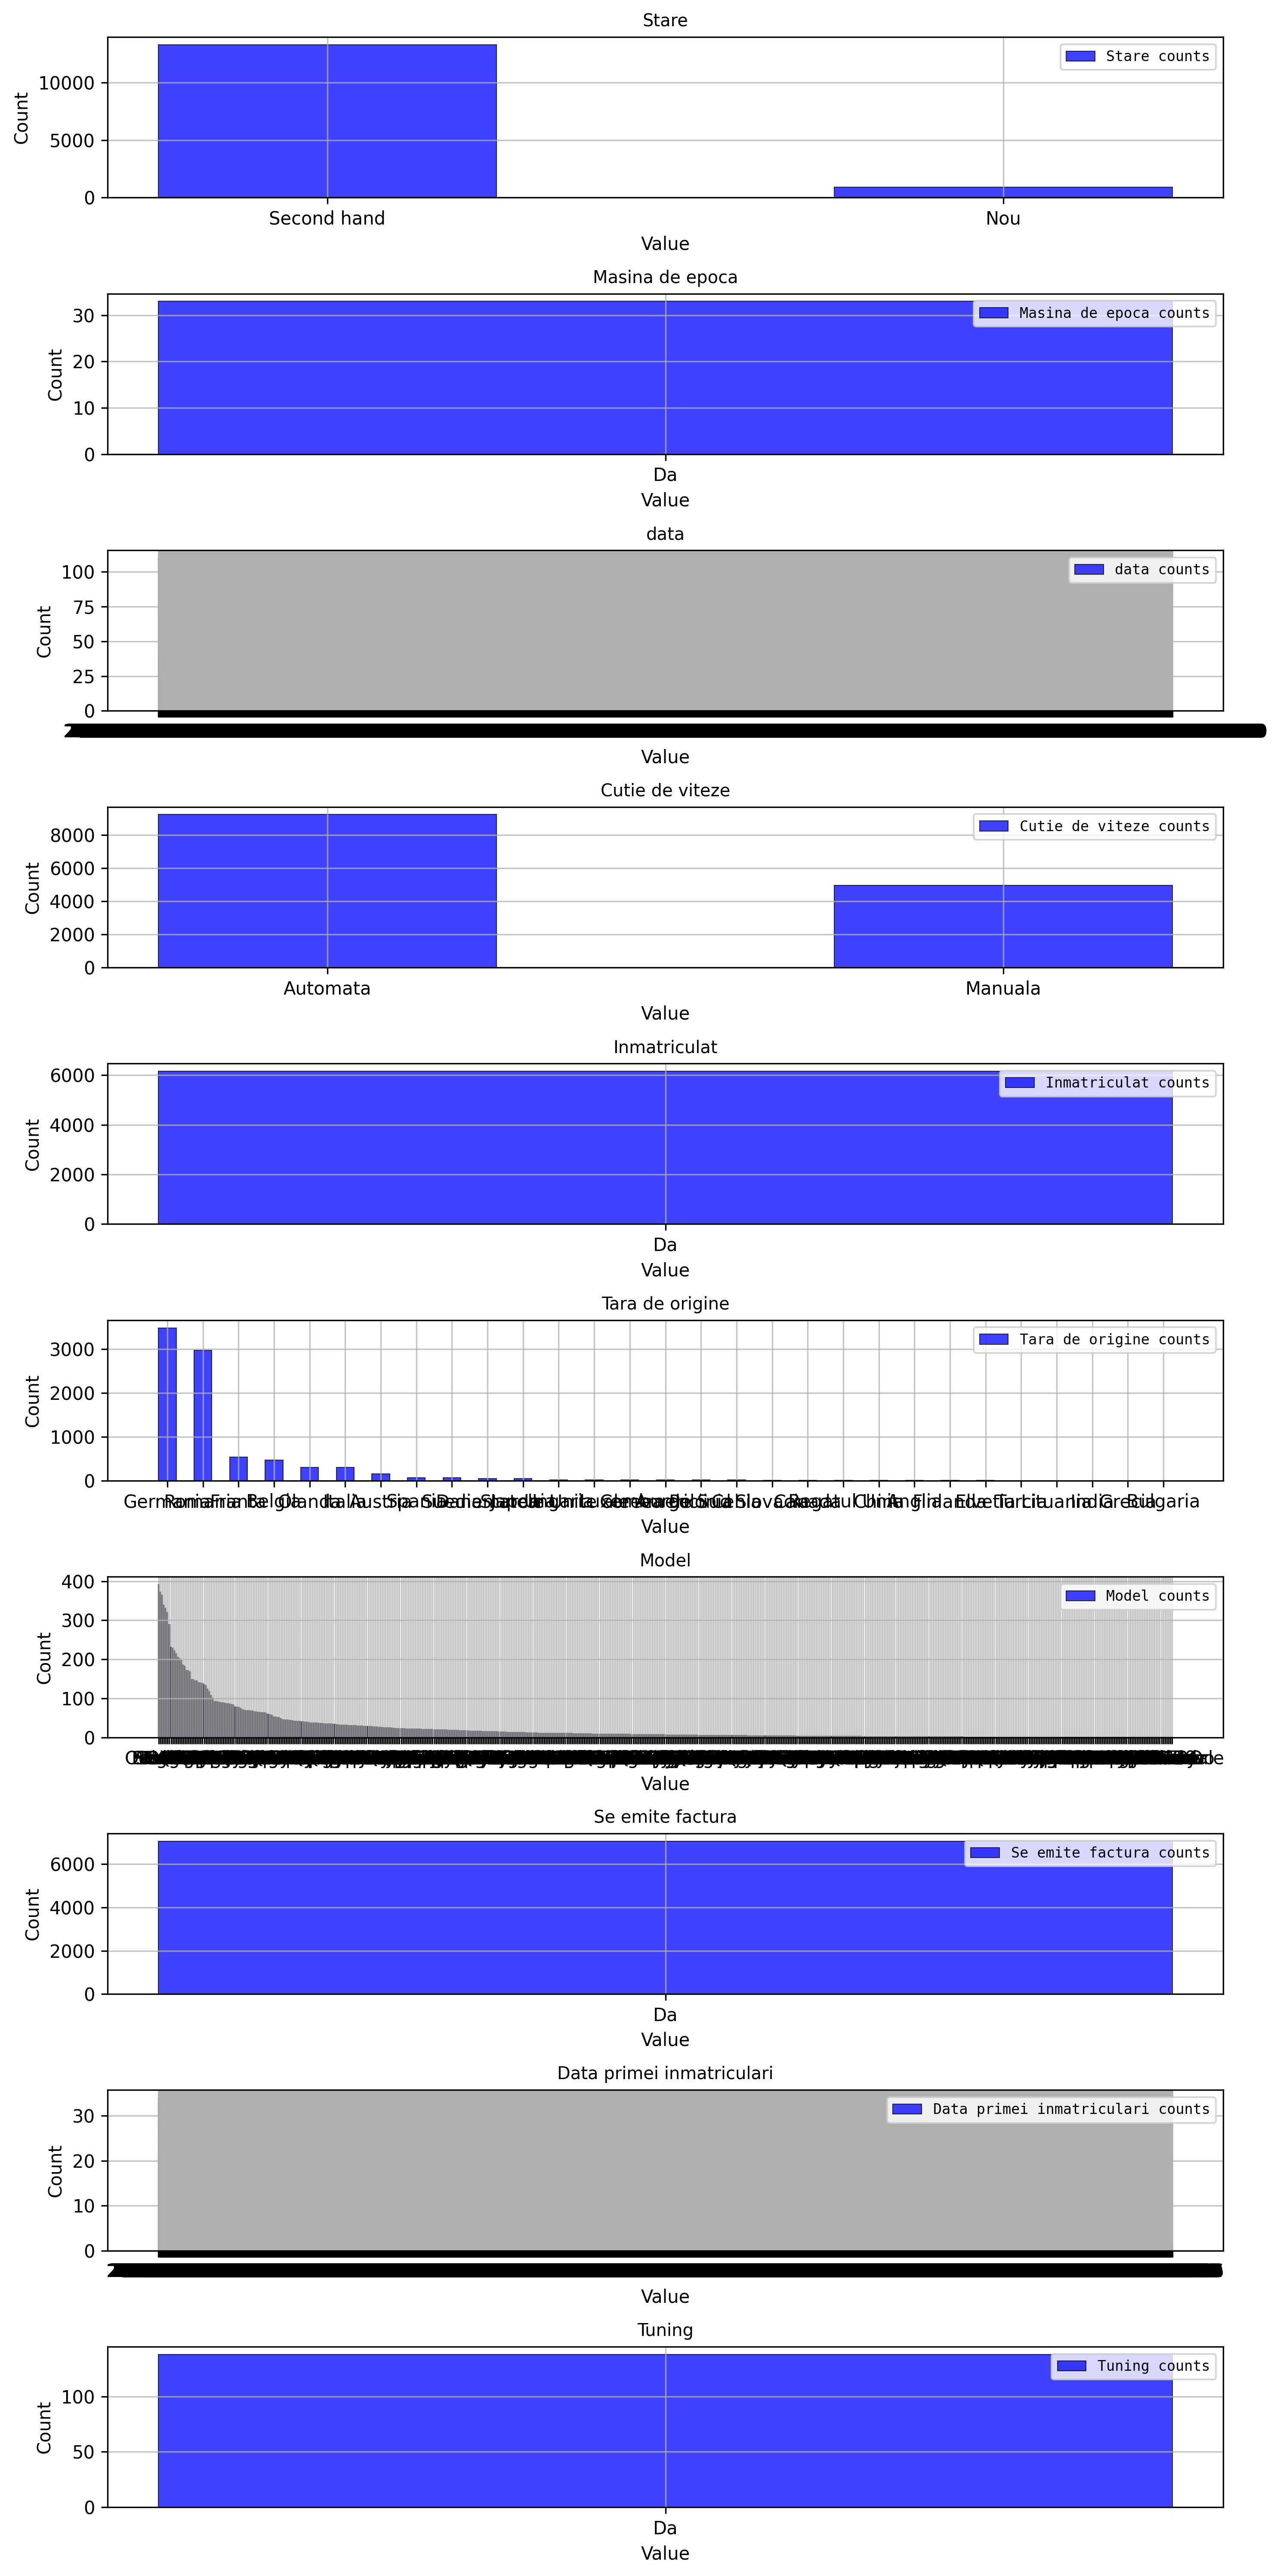

In [ ]:
cols = new_df.select_dtypes('object').columns

# o sa dureze un pic daca lasam comentata aceasta linie
# prima data am lasat totul sa ruleze pentru a-mi face o idee
cols = np.random.choice(cols, 10, replace=False)

fig, ax = plt.subplots(10, 1, figsize=(10, 20), dpi=300)
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.size'] = 8
for idx, col in enumerate(cols):
  try:
    counts = new_df[col].value_counts()
    ax[idx].bar(counts.index, counts.values, alpha=0.75, label=f'{col} counts', color='blue', edgecolor='black', linewidth=0.5, width=0.5)
    ax[idx].set_title(col)
    ax[idx].set_ylabel('Count')
    ax[idx].set_xlabel('Value')
    ax[idx].grid(alpha=0.75)
    ax[idx].legend()
  except:
    print(f"ignore col {col}")
plt.tight_layout()
plt.show()

Se observa ca la unele coloane sunt valori preponderente, la altele exista doar o singura valoare, insa sunt si multe cu valori destul de distincte.



---

O distributie a valorilor de int.




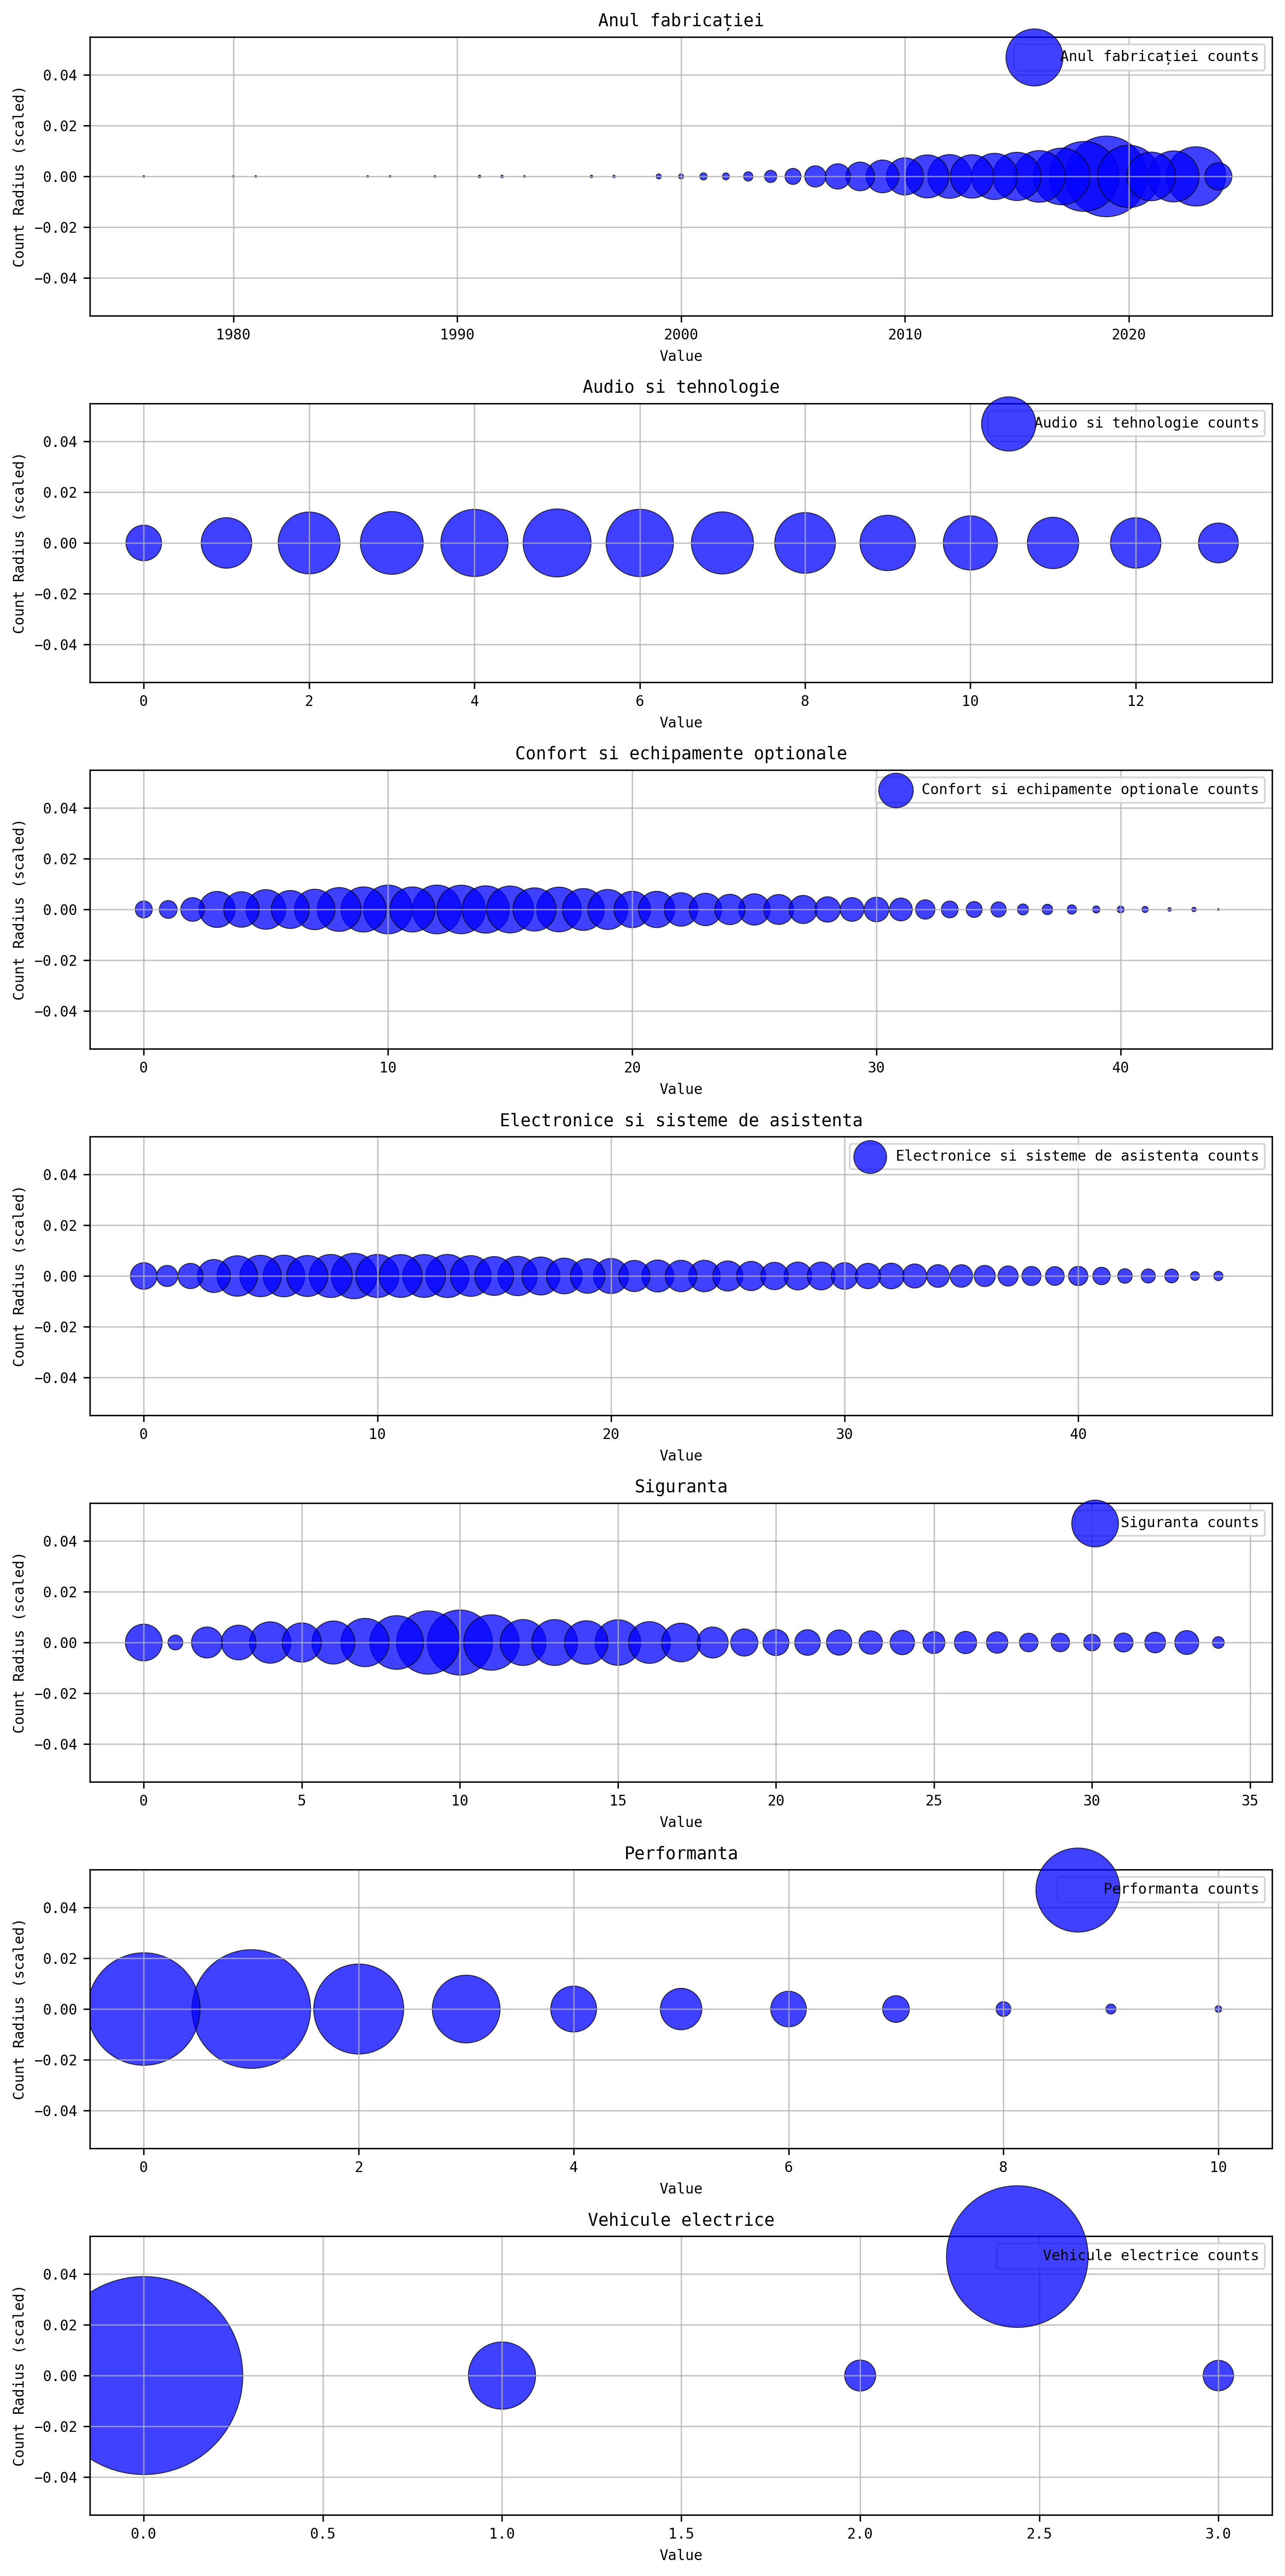

In [ ]:
cols = new_df.select_dtypes('int64').columns

fig, ax = plt.subplots(7, 1, figsize=(10, 20), dpi=300)
plt.rcParams['font.family'] = 'monospace'


plt.rcParams['font.size'] = 8
for idx, col in enumerate(cols):
    counts = new_df[col].value_counts()

    ax[idx].scatter(counts.index, np.zeros(len(counts)), alpha=0.75, label=f'{col} counts', color='blue', edgecolor='black', linewidth=0.5, s=counts.values)
    ax[idx].set_title(col)
    ax[idx].set_ylabel('Count Radius (scaled)')
    ax[idx].set_xlabel('Value')
    ax[idx].grid(alpha=0.75)
    ax[idx].legend()


    handles, labels = ax[idx].get_legend_handles_labels()
plt.tight_layout()

In [ ]:
a = new_df.select_dtypes('float64').columns
print(len(a))


20


In [ ]:
for col in new_df.select_dtypes('float64').columns:
    print(col, new_df[col].unique())

pret [  9999.   3150.  12495. ...  32448. 105910. 269900.]
Km [225000. 160000. 159242. ... 177989.  51444. 268103.]
Putere [ 140.  100.  110.   91.  190.  150.  109.  122.  130.  120.  175.   88.
  136.  250.  170.  215.  116.  115.  185.  160.  272.  340.  235.  184.
  165.   75.  125.  351.  381.   92.  180.   90.   95.  194.  163.  173.
  258.  102.  129.  550.  143.  200.  265.  404.  177.  179.  240.  218.
   80.  435.   85.  320.  462.   84.  249.  612.   87.  245.  510.   70.
  280.  155.  152.  286.  431.  134.   73.  192.  256.  292.  154.  211.
   98.  183.  141.   68.  105.  252.  131.  231.  182.  585.  625.  523.
  367.  416.  330.  270.  197.  310.   83.  187.  408.  204.  299.  262.
  305.  440.  230.  156.  106.  149.  349.  117.  157.  313.  217.  220.
   94.  544.  253.  148.  178.  303.  213.   99.  306.  400.  285.  132.
  557.   45.  333.  796.  469.   64.   44.  153.  224.  426.  228.  350.
  300.  225.    6.   72.  600.  181.  199.  203.  284.   65.  507.  298.
 

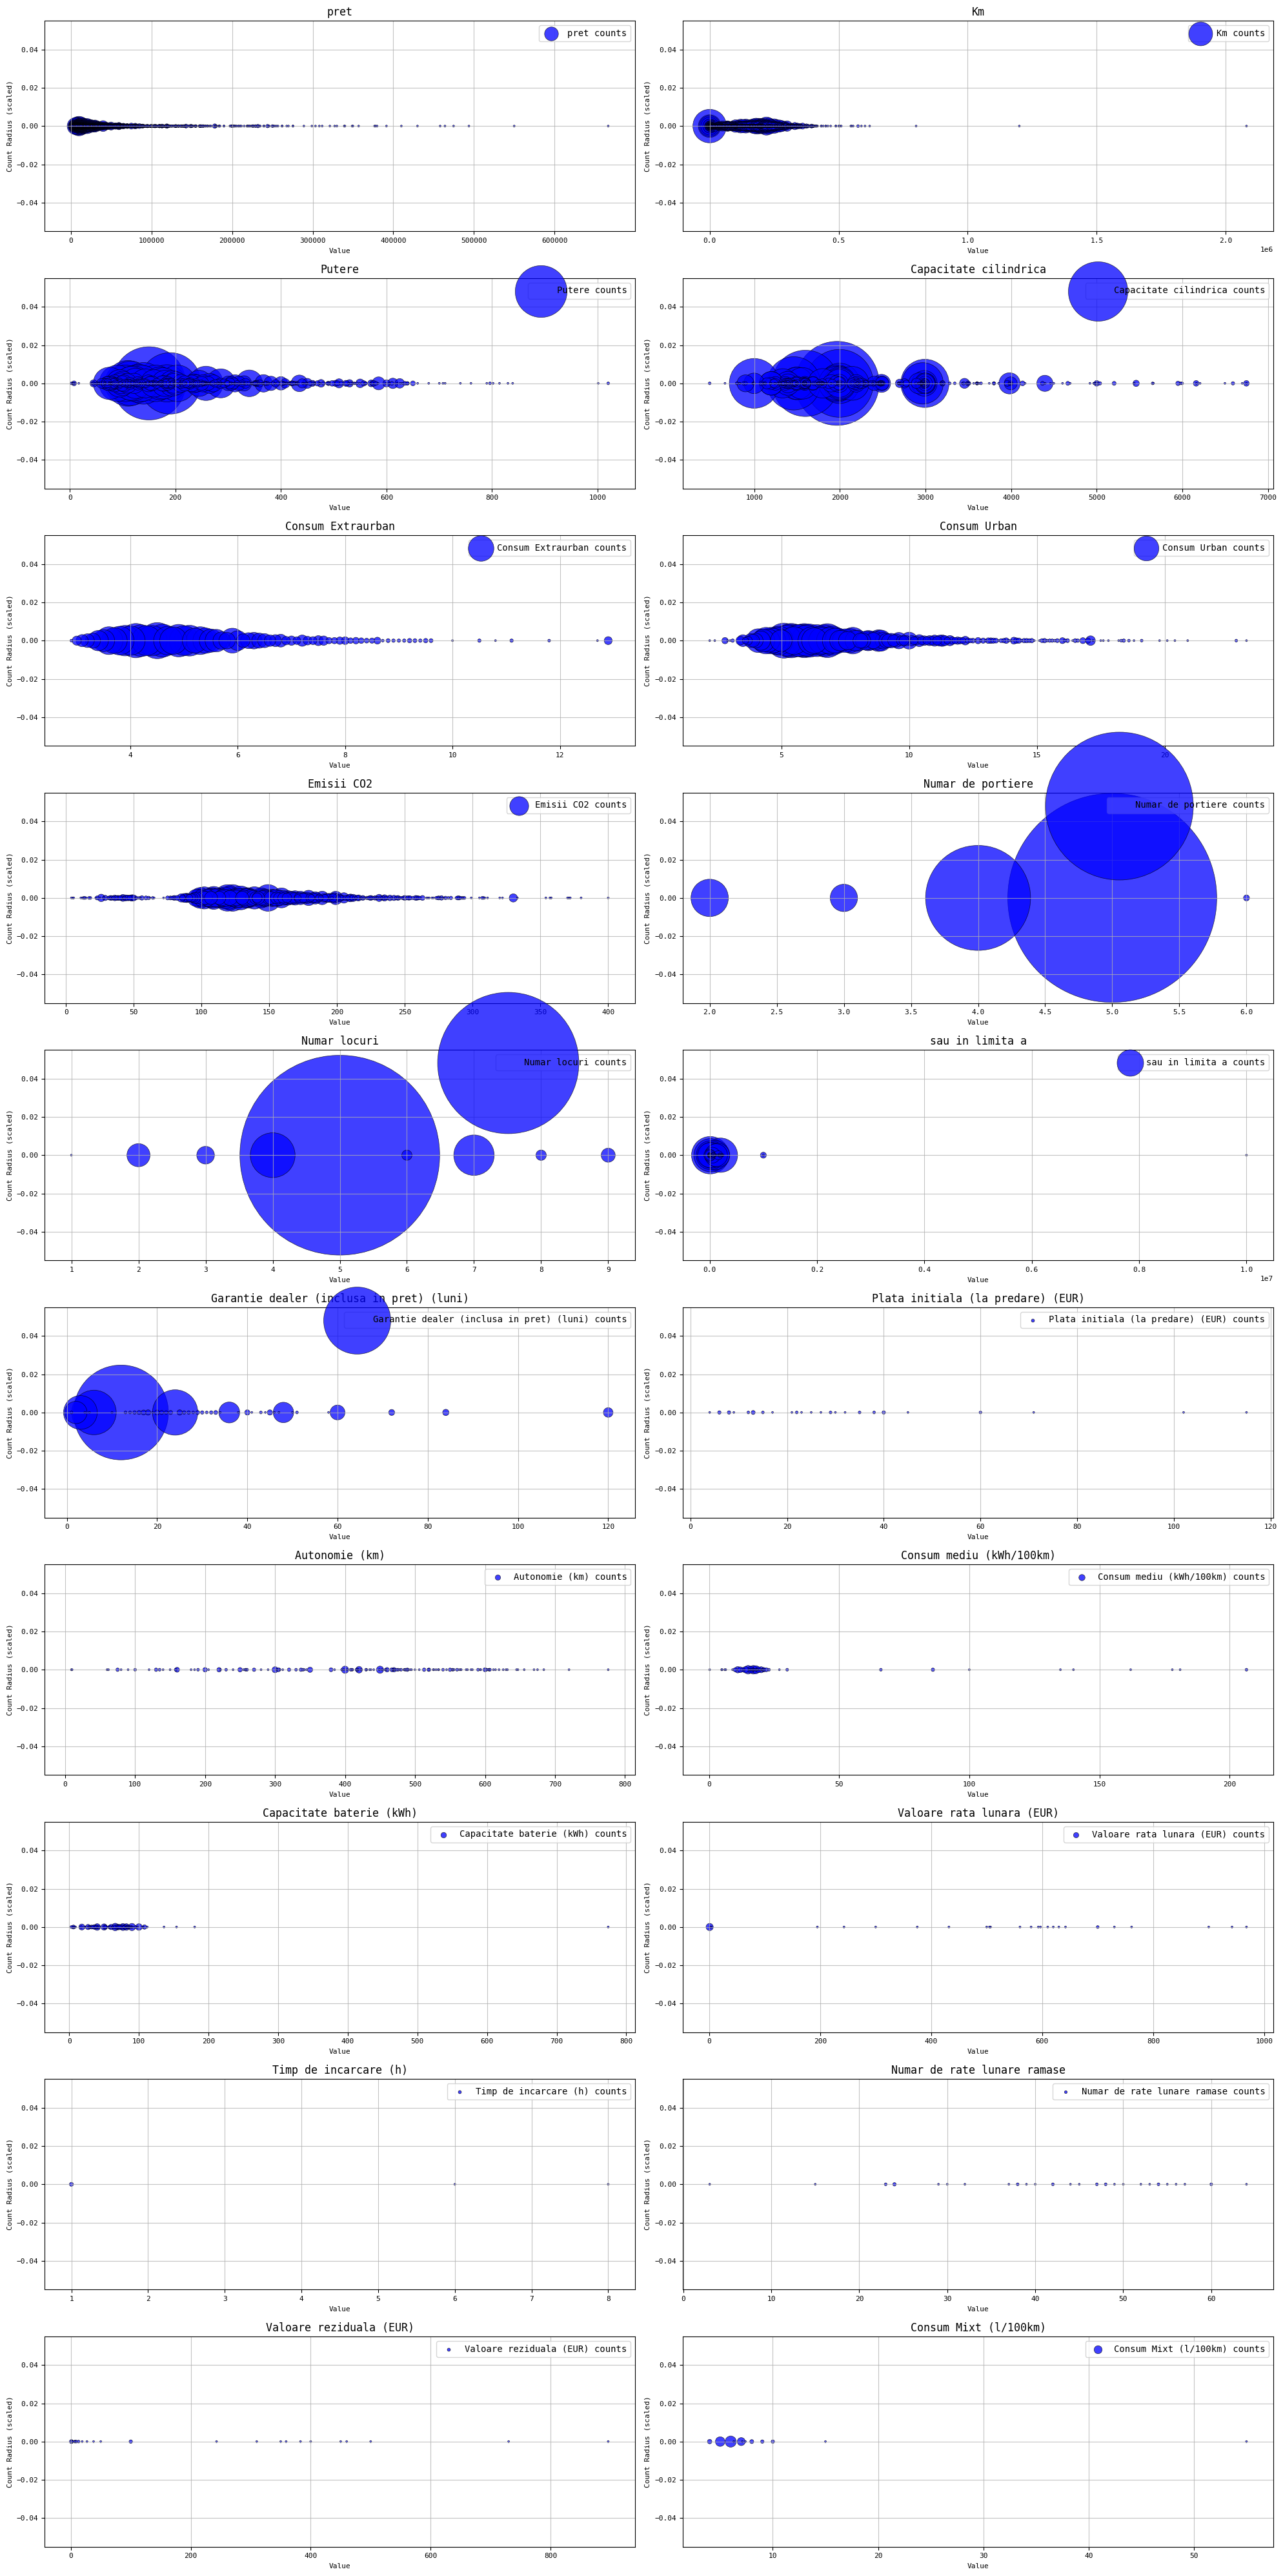

In [ ]:
cols = new_df.select_dtypes('float64').columns

num_cols = 2
num_rows = int(np.ceil(len(cols) / num_cols))

fig, ax = plt.subplots(num_rows, num_cols, figsize=(20, 40))
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.size'] = 10

for idx, col in enumerate(cols):

    row_idx = idx // num_cols
    col_idx = idx % num_cols

    counts = new_df[col].value_counts()
    ax[row_idx, col_idx].scatter(counts.index, np.zeros(len(counts)), alpha=0.75, label=f'{col} counts', color='blue', edgecolor='black', linewidth=0.5, s=counts.values * 5)  # Ajustează mărimea punctelor cu s=counts.values * factor
    ax[row_idx, col_idx].set_title(col)
    ax[row_idx, col_idx].set_ylabel('Count Radius (scaled)')
    ax[row_idx, col_idx].set_xlabel('Value')
    ax[row_idx, col_idx].grid(alpha=0.75)
    ax[row_idx, col_idx].legend()

plt.tight_layout()
plt.show()

Prin aceasta reprezentare, putem sa ne face o idee cam care sunt valorile predominante, unde ar fi date concluzive.
Chiar si asa, nu putem sa ne luam doar dupa acest aspect deoarece, multe date poate sunt lipsa, sau NaN.

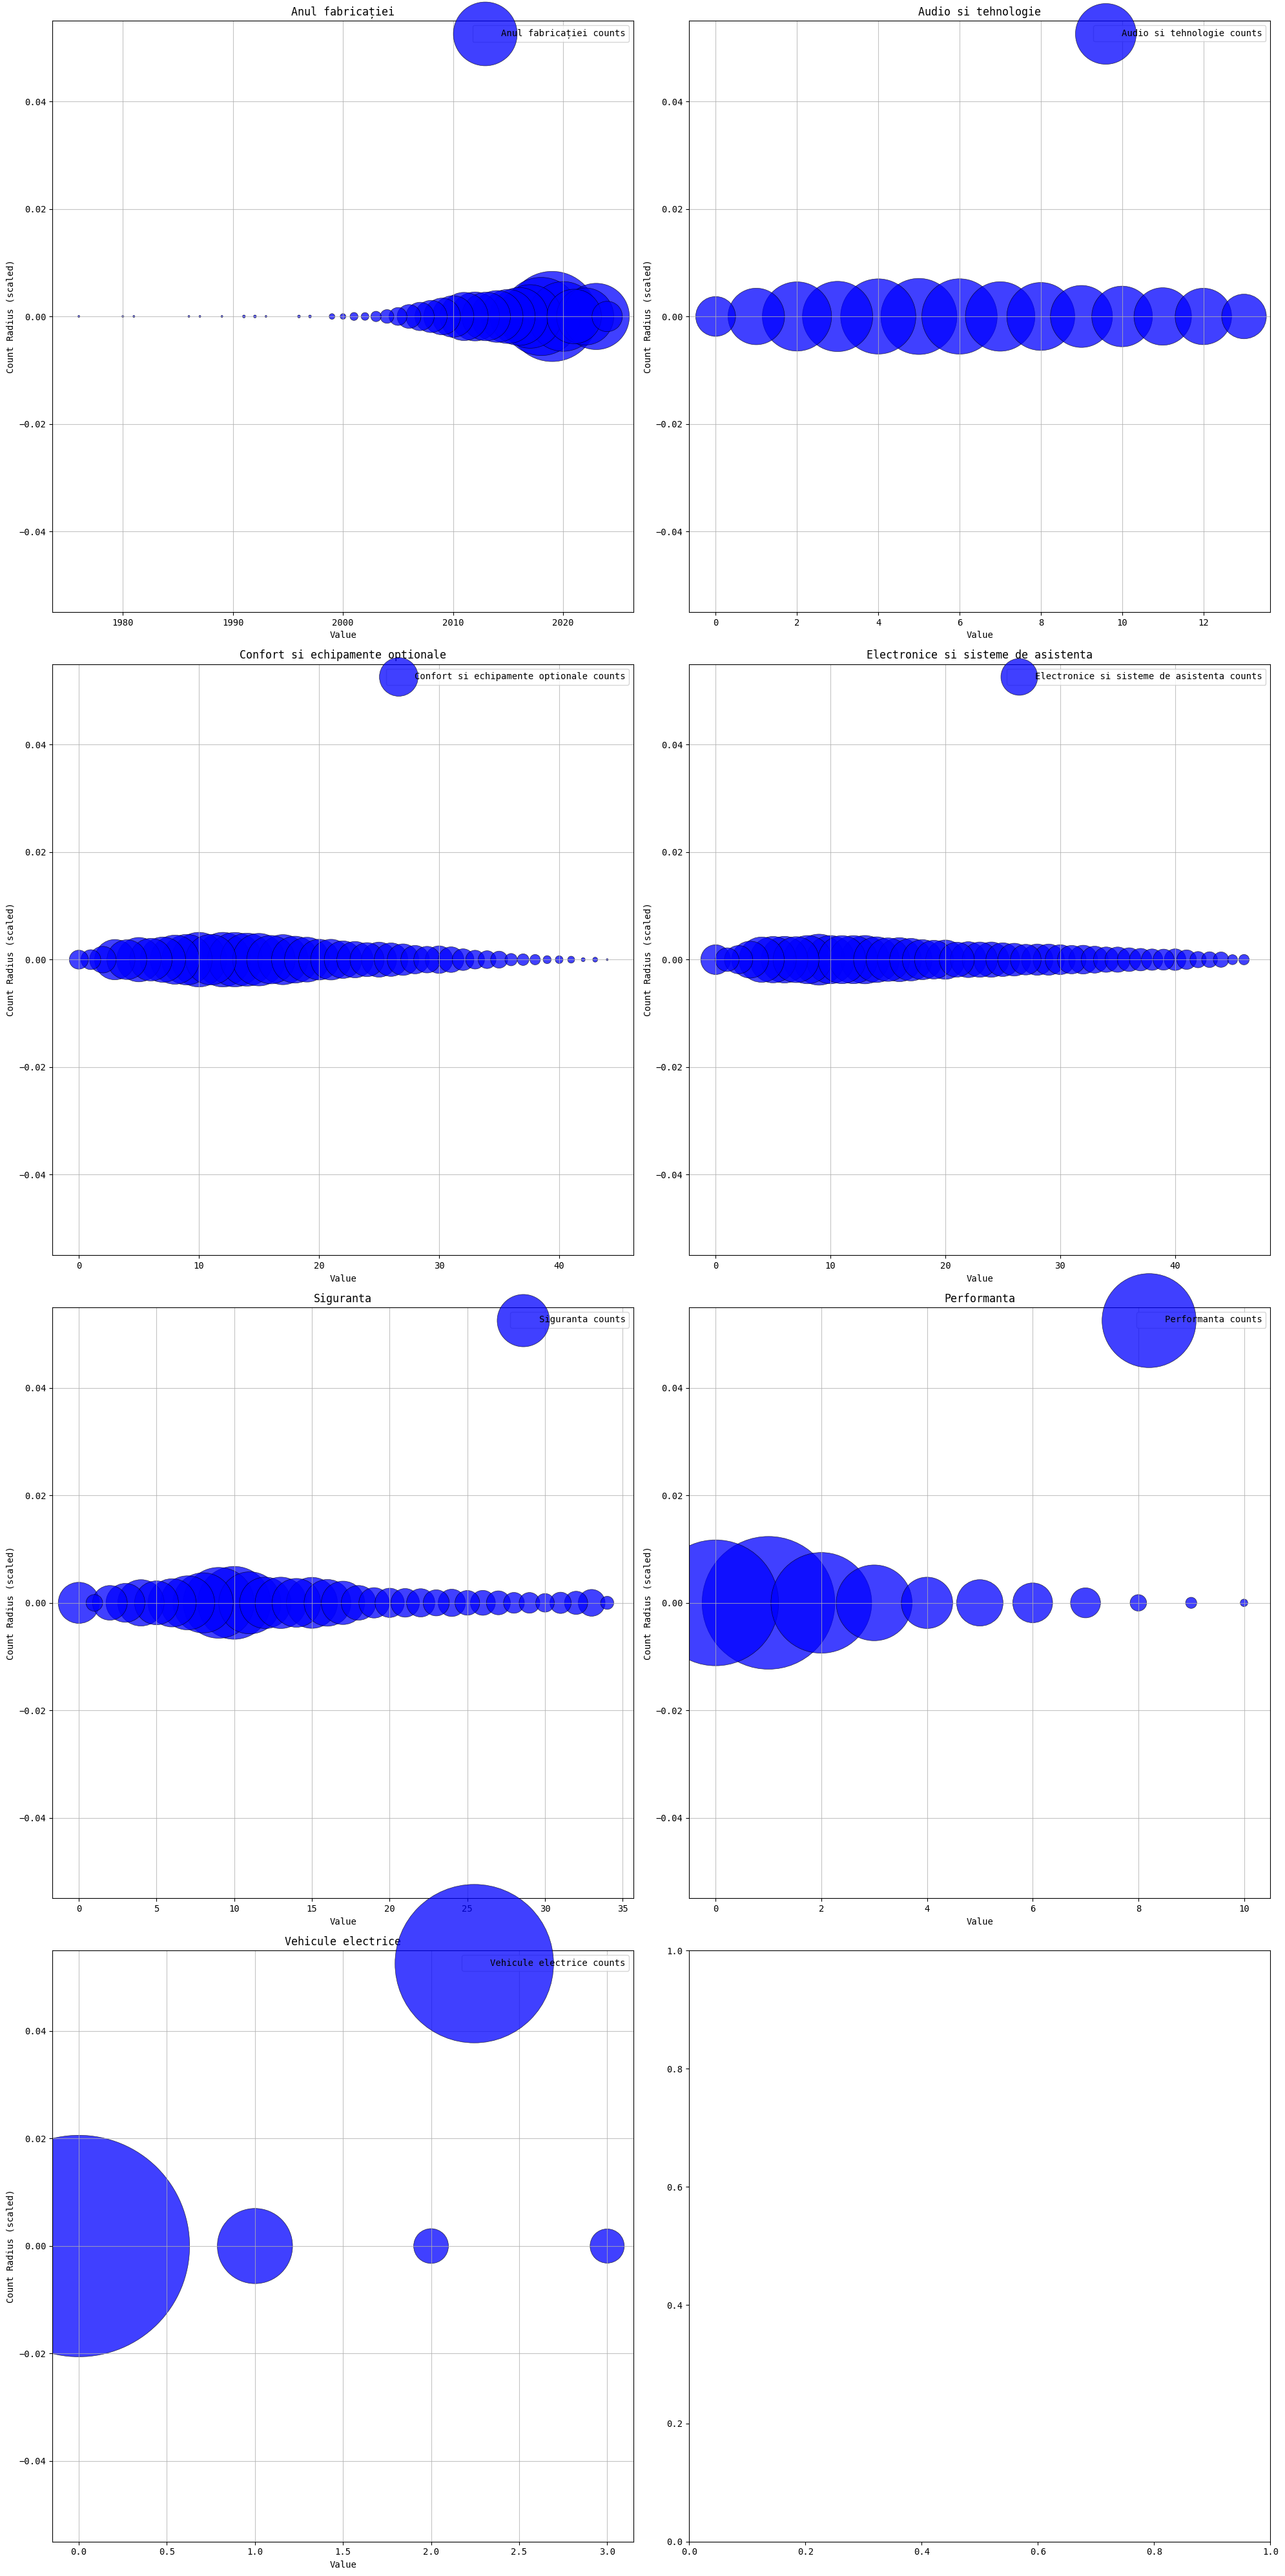

In [ ]:
cols = new_df.select_dtypes('int64').columns

num_cols = 2
num_rows = int(np.ceil(len(cols) / num_cols))

fig, ax = plt.subplots(num_rows, num_cols, figsize=(20, 40))
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.size'] = 10

for idx, col in enumerate(cols):

    row_idx = idx // num_cols
    col_idx = idx % num_cols

    counts = new_df[col].value_counts()
    ax[row_idx, col_idx].scatter(counts.index, np.zeros(len(counts)), alpha=0.75, label=f'{col} counts', color='blue', edgecolor='black', linewidth=0.5, s=counts.values * 5)  # Ajustează mărimea punctelor cu s=counts.values * factor
    ax[row_idx, col_idx].set_title(col)
    ax[row_idx, col_idx].set_ylabel('Count Radius (scaled)')
    ax[row_idx, col_idx].set_xlabel('Value')
    ax[row_idx, col_idx].grid(alpha=0.75)
    ax[row_idx, col_idx].legend()

plt.tight_layout()
plt.show()

---

Prin verificarea a cate valori NaN exista, putem decide si asupra stergerii acelor coloane/ completarii cu date a acelei coloane (in functie de caz).


In [ ]:
for col in new_df.columns:
    if new_df[col].dtype == 'int':
        num_nan = new_df[col].isna().sum()
        total_val = new_df[col].shape[0]

        print(f'{col}: {num_nan} valori NaN din {total_val} valori totale.')


Anul fabricației: 0 valori NaN din 14206 valori totale.
Audio si tehnologie: 0 valori NaN din 14206 valori totale.
Confort si echipamente optionale: 0 valori NaN din 14206 valori totale.
Electronice si sisteme de asistenta: 0 valori NaN din 14206 valori totale.
Siguranta: 0 valori NaN din 14206 valori totale.
Performanta: 0 valori NaN din 14206 valori totale.
Vehicule electrice: 0 valori NaN din 14206 valori totale.


In cazul coloanelor cu date int, nu exista valori NaN deoarece am mers pe cazul Test2. Daca mergeam cu test1, aveam o multime de date NaN.

In [ ]:
for col in new_df.columns:

    if new_df[col].dtype == 'float':
        num_nan = new_df[col].isna().sum()
        total_val = new_df[col].shape[0]

        print(f'{col}: {num_nan} valori NaN din {total_val} valori totale.')


pret: 0 valori NaN din 14206 valori totale.
Km: 50 valori NaN din 14206 valori totale.
Putere: 4 valori NaN din 14206 valori totale.
Capacitate cilindrica: 407 valori NaN din 14206 valori totale.
Consum Extraurban: 8231 valori NaN din 14206 valori totale.
Consum Urban: 4447 valori NaN din 14206 valori totale.
Emisii CO2: 7251 valori NaN din 14206 valori totale.
Numar de portiere: 53 valori NaN din 14206 valori totale.
Numar locuri: 3054 valori NaN din 14206 valori totale.
sau in limita a: 12054 valori NaN din 14206 valori totale.
Garantie dealer (inclusa in pret) (luni): 10142 valori NaN din 14206 valori totale.
Plata initiala (la predare) (EUR): 14166 valori NaN din 14206 valori totale.
Autonomie (km): 13945 valori NaN din 14206 valori totale.
Consum mediu (kWh/100km): 14038 valori NaN din 14206 valori totale.
Capacitate baterie (kWh): 13965 valori NaN din 14206 valori totale.
Valoare rata lunara (EUR): 14168 valori NaN din 14206 valori totale.
Timp de incarcare (h): 14200 valori NaN 

Fiind vorba despre masini si despre anunturi care au fost facute in mare fara un sablon predefinit, multe anunturi omit anumite aspecte.

Sau nu are rost sa pui la un anunt anumite lucruri:
de ex: de ce ar fi pusa Valoare reziduala la masini pe care nu ti-ar fi pusa posibilitatea de cumparare in rate? La fel si pentru numarul de rate lunare ramase si tot asa.

Daca continuam pe ideea vizualizarii pretului in functie de masina, putem ignora partea cu ratele sau cumparatul in leasing. Masina de regula va avea afisat acelasi pret, indiferent daca este cumparata simplu sau in leasing.




In [ ]:
for col in new_df.columns:
    if new_df[col].dtype == 'object':
        num_nan = new_df[col].isna().sum()
        total_val = new_df[col].shape[0]

        print(f'{col}: {num_nan} valori NaN din {total_val} valori totale.')


id: 0 valori NaN din 14206 valori totale.
data: 0 valori NaN din 14206 valori totale.
nume: 0 valori NaN din 14206 valori totale.
url: 0 valori NaN din 14206 valori totale.
Oferit de: 0 valori NaN din 14206 valori totale.
Are VIN (Serie sasiu): 5885 valori NaN din 14206 valori totale.
Marca: 0 valori NaN din 14206 valori totale.
Model: 0 valori NaN din 14206 valori totale.
Versiune: 3019 valori NaN din 14206 valori totale.
Combustibil: 0 valori NaN din 14206 valori totale.
Transmisie: 1735 valori NaN din 14206 valori totale.
Cutie de viteze: 0 valori NaN din 14206 valori totale.
Tip Caroserie: 0 valori NaN din 14206 valori totale.
Culoare: 0 valori NaN din 14206 valori totale.
Se emite factura: 7135 valori NaN din 14206 valori totale.
Eligibil pentru finantare: 7186 valori NaN din 14206 valori totale.
Primul proprietar (de nou): 8339 valori NaN din 14206 valori totale.
Fara accident in istoric: 5377 valori NaN din 14206 valori totale.
Carte de service: 5251 valori NaN din 14206 valori 

Din campurile de tip object, se observa lipsa de valori la coloane care nu ar trebui neaparat sa afecteze pretul masinii (se emite facuta, eligibil pt finantare, etc) dar sunt si coloane care, presupun, pot creste valoarea masinii daca au campul setat (masina de epoca, norma de poluare, etc)



---

Hai sa eliminam direct coloanele care au o singura valoare distincta in afara de NaN.

In [ ]:
for col in new_df.columns:
    if new_df[col].dtype == 'object':
        num_nan = new_df[col].isna().sum()
        total_val = new_df[col].shape[0]

        print(f'{col}: {num_nan} valori NaN din {total_val} valori totale.')


for col in new_df.select_dtypes('object').columns:
   try:
      if not isinstance(df[col].iloc[0], list):
          print(col, df[col].unique())

   except:
        print(f'{col}: [Listă de valori, tratată separat]')



id: 0 valori NaN din 14206 valori totale.
data: 0 valori NaN din 14206 valori totale.
nume: 0 valori NaN din 14206 valori totale.
url: 0 valori NaN din 14206 valori totale.
Oferit de: 0 valori NaN din 14206 valori totale.
Are VIN (Serie sasiu): 5885 valori NaN din 14206 valori totale.
Marca: 0 valori NaN din 14206 valori totale.
Model: 0 valori NaN din 14206 valori totale.
Versiune: 3019 valori NaN din 14206 valori totale.
Combustibil: 0 valori NaN din 14206 valori totale.
Transmisie: 1735 valori NaN din 14206 valori totale.
Cutie de viteze: 0 valori NaN din 14206 valori totale.
Tip Caroserie: 0 valori NaN din 14206 valori totale.
Culoare: 0 valori NaN din 14206 valori totale.
Se emite factura: 7135 valori NaN din 14206 valori totale.
Eligibil pentru finantare: 7186 valori NaN din 14206 valori totale.
Primul proprietar (de nou): 8339 valori NaN din 14206 valori totale.
Fara accident in istoric: 5377 valori NaN din 14206 valori totale.
Carte de service: 5251 valori NaN din 14206 valori 

In [ ]:
for col in new_df.select_dtypes('object').columns:
   try:
      if not isinstance(new_df[col].iloc[0], list):
          if len(new_df[col].unique()) < 3:
              print(col, new_df[col].unique())
              num_nan = new_df[col].isna().sum()
              total_val = new_df[col].shape[0]
              print(f'{col}: {num_nan} valori NaN din {total_val} valori totale.\n')

   except:
        print(f'{col}: [Listă de valori, tratată separat]')



Oferit de ['Firma' 'Privat']
Oferit de: 0 valori NaN din 14206 valori totale.

Are VIN (Serie sasiu) ['Da' nan]
Are VIN (Serie sasiu): 5885 valori NaN din 14206 valori totale.

Cutie de viteze ['Automata' 'Manuala']
Cutie de viteze: 0 valori NaN din 14206 valori totale.

Se emite factura ['Da' nan]
Se emite factura: 7135 valori NaN din 14206 valori totale.

Eligibil pentru finantare ['Da' nan]
Eligibil pentru finantare: 7186 valori NaN din 14206 valori totale.

Primul proprietar (de nou) ['Da' nan]
Primul proprietar (de nou): 8339 valori NaN din 14206 valori totale.

Fara accident in istoric ['Da' nan]
Fara accident in istoric: 5377 valori NaN din 14206 valori totale.

Carte de service ['Da' nan]
Carte de service: 5251 valori NaN din 14206 valori totale.

Stare ['Second hand' 'Nou']
Stare: 0 valori NaN din 14206 valori totale.

VIN (serie sasiu) ['Vezi VIN-ul (seria de sasiu)' nan]
VIN (serie sasiu): 5879 valori NaN din 14206 valori totale.

Inmatriculat [nan 'Da']
Inmatriculat: 8046 v

O sa luam pe cazuri si ce ar trebui facut:
- oferit de: exista doar 2 valori, nicio valoare de NaN. Desi in realitate nu cred ca ar depinde prea mult de cine ofera spre vanzare masina, o sa mapam valorile firma/privat in 0 sau 1.
- are vin: in baza de date nu am vazut nicio serie vin afisata. Chiar si asa, toate masinile ar trebui sa-l aiba. Asadar, nu are rost sa pastram coloana
- cutie de viteze: 2 valori relevante. o sa transpunem in 0 si 1
- se emite factura: avem da si nan in procente oarecum egale. Nu consider necesara coloana
- eligibil pentru finantare: acelasi lucru ca mai sus, da si nan in procente aproape egale. Daca am primi un feedback despre metoda de cumparare a masinilor (daca au fost cumparate direct sau prin finantare) ar fi util sa avem coloana aceasta. Daca ne intereseaza doar preturile in functie de ceea ce ofera masina, nu prea consider necesara. O sa o elimin.
- VIN (serie sasiu): nu sunt vin-uri in sine, e doar text. O sa elimin coloana
- primul proprietar: nu consider necesara coloana
- carte de service: nu consider necesara coloana
- fara accident in istoric: exista doar valoarea da si NaN, cu doar o treime de da. Chiar daca acest camp s-ar putea reflecta in pret, nu putem presupune ca NaN inseamna neaparat ca au avut accident sau nu. Deci o sa eliminam coloana ca nu sunt valori destule.
- starea: are 2 valori, niciuna NaN. Aceasta coloana,probabil, poate influenta pretul final, asadar o sa o transpun in 0 si 1.
- inmatriculat: nu ar influenta pretul final, multe valori lipsa, o sa elimin coloana.
- tuning: multe valori lipsa, o sa elimin coloana
- contract baterie: multe valori lipsa si nu putem presupune ca lipsa valorii inseamna neaparat faptul ca  contract baterie nu este inclus. O sa elimin coloana.
- masina de epoca: desi pretul poate fi extrem de influentat de acest aspect, masina de epoca ar fi o exceptie din acest dataset. Sunt 42 de masini de epoca (42 de valori 'Da'). Sunt prea putine valori pentru a face corelatii bune, si ideal ar trebui un dataset specific pentru ele. O sa elimin coloana si masinile de epoca din dataset.
- volan pe dreapta: doar ~40 de valori cu da, restul lipsa. Desi conteaza ca pret daca ai volan pe dreapta sau nu, lipsa valorilor nu inseamna ca ar avea volan pe stanga. Asadar, o sa elimin coloana.
- predare leasing: multe valori lipsa si de asemenea nu consider relevanta coloana. O sa o elimin.

In [ ]:
# Eliminam coloanele
new_df = new_df.drop(columns=['Are VIN (Serie sasiu)', 'Se emite factura', 'Oferit de', 'Eligibil pentru finantare', 'Primul proprietar (de nou)', 'Fara accident in istoric',
                              'Carte de service', 'VIN (serie sasiu)', 'Inmatriculat', 'Tuning', 'Contract baterie', 'Volan pe dreapta', 'Predare leasing'])

print(new_df.columns)

Index(['id', 'data', 'nume', 'pret', 'url', 'Marca', 'Model', 'Versiune',
       'Anul fabricației', 'Km', 'Combustibil', 'Putere',
       'Capacitate cilindrica', 'Transmisie', 'Consum Extraurban',
       'Cutie de viteze', 'Consum Urban', 'Tip Caroserie', 'Emisii CO2',
       'Numar de portiere', 'Culoare', 'Numar locuri', 'sau in limita a',
       'Garantie dealer (inclusa in pret) (luni)', 'Stare',
       'Audio si tehnologie', 'Confort si echipamente optionale',
       'Electronice si sisteme de asistenta', 'Siguranta', 'Generatie',
       'Norma de poluare', 'Optiuni culoare', 'Tara de origine',
       'Data primei inmatriculari', 'Performanta',
       'Garantie de la producator pana la', 'Vehicule electrice',
       'Masina de epoca', 'Plata initiala (la predare) (EUR)',
       'Autonomie (km)', 'Consum mediu (kWh/100km)',
       'Capacitate baterie (kWh)', 'Valoare rata lunara (EUR)',
       'Timp de incarcare (h)', 'Numar de rate lunare ramase',
       'Valoare reziduala (EUR)

In [ ]:
# Eliminăm intrările unde coloana 'masina de epoca' este setată pe 'Da'
new_df = new_df[new_df['Masina de epoca'] != 'Da']

# Eliminăm coloana 'masina de epoca'
new_df = new_df.drop(columns=['Masina de epoca'])

In [ ]:
# automata = 1, manuala = 0
new_df['Cutie de viteze'] = new_df['Cutie de viteze'].replace({'Automata': 1, 'Manuala': 0})

# second hand = 0, nou = 1
new_df['Stare'] = new_df['Stare'].replace({'Second hand': 0, 'Nou': 1})

In [ ]:
for col in new_df.select_dtypes('object').columns:
   try:
      if not isinstance(new_df[col].iloc[0], list):
          print(col, new_df[col].unique())
   except:
        print(f'{col}: [Listă de valori, tratată separat]')


id ['7053131628' '7053116553' '7052796079' ... '7052229020' '7053209543'
 '7052947229']
data ['2024-03-06 11:49:00' '2024-03-06 11:37:00' '2024-03-06 11:38:00' ...
 '2024-03-06 08:09:00' '2024-03-06 08:45:00' '2024-03-06 08:55:00']
nume ['Volkswagen Tiguan 2.0 TDI 4Motion DSG Sport & Style' 'Opel Astra'
 'Renault Megane' ... 'Volkswagen Touareg 3.0 V6 TDI DPF Aut. Mountain'
 'Mazda 2 1.3i CE Plus' 'Lexus Seria RX 450h AWD Executive Sport Edition']
url ['https://www.autovit.ro/autoturisme/anunt/volkswagen-tiguan-2-0-tdi-4motion-dsg-sport-style-ID7HkdJy.html'
 'https://www.autovit.ro/autoturisme/anunt/opel-astra-ID7Hk9Op.html'
 'https://www.autovit.ro/autoturisme/anunt/renault-megane-ID7HiOrt.html'
 ...
 'https://www.autovit.ro/autoturisme/anunt/mercedes-benz-c-ID7HgqWm.html'
 'https://www.autovit.ro/autoturisme/anunt/mercedes-benz-glc-300-e-4matic-ID7Hky0f.html'
 'https://www.autovit.ro/autoturisme/anunt/nissan-qashqai-ID7HjrLn.html']
Marca ['Volkswagen' 'Opel' 'Renault' 'Dacia' 'BMW' '



---


Daca tot suntem la capitolul eliminari si subtituiri, o sa mai eliminam modificam ce mi se pare redundant, nefolositor sau are nevoie de o schimbare.
- id (un id specific site-ului)
- url (url-ul catre pagina site-ului de vanzari, nu ajuta la analiza)
- data (nu ajuta la analiza)
- numele e format din marca model si versiune. O sa le pastrez pe toate totusi.
- generatie o sa elimin
- optiuni de culoane o sa elimin. Multe valori lipsa, putine optiuni, iar faptul ca exista mai multe culori disponibile nu se reflecta in pret deoarece poate o masina cu o alta culoare e mai scumpa decat ceea ce e afisat ca ar avea si alte optiuni.
- garantie de la producator o sa elimin.
- data primei inmatriculari o sa elimin.
- combustibil, transmisie, tip caroserie si culoare nu o sa elimin, doar o sa transpun valorile string in numere.


In [ ]:
# Eliminam coloanele
new_df = new_df.drop(columns=['id', 'data', 'url', 'Generatie', 'Optiuni culoare', 'Data primei inmatriculari',
                              'Garantie de la producator pana la'])

print(new_df.columns)

Index(['nume', 'pret', 'Marca', 'Model', 'Versiune', 'Anul fabricației', 'Km',
       'Combustibil', 'Putere', 'Capacitate cilindrica', 'Transmisie',
       'Consum Extraurban', 'Cutie de viteze', 'Consum Urban', 'Tip Caroserie',
       'Emisii CO2', 'Numar de portiere', 'Culoare', 'Numar locuri',
       'sau in limita a', 'Garantie dealer (inclusa in pret) (luni)', 'Stare',
       'Audio si tehnologie', 'Confort si echipamente optionale',
       'Electronice si sisteme de asistenta', 'Siguranta', 'Norma de poluare',
       'Tara de origine', 'Performanta', 'Vehicule electrice',
       'Plata initiala (la predare) (EUR)', 'Autonomie (km)',
       'Consum mediu (kWh/100km)', 'Capacitate baterie (kWh)',
       'Valoare rata lunara (EUR)', 'Timp de incarcare (h)',
       'Numar de rate lunare ramase', 'Valoare reziduala (EUR)',
       'Consum Mixt (l/100km)'],
      dtype='object')


In [ ]:
new_df['Tip Caroserie'] = new_df['Tip Caroserie'].replace({'SUV': 0, 'Compacta': 1, 'Combi': 2, 'Sedan': 3, 'Coupe':4, 'Masina de oras':5, 'Monovolum':6, 'Masina mica':7, 'Cabrio':8})
new_df['Transmisie'] = new_df['Transmisie'].replace({ 'Spate': 1, 'Fata': 2, '4x4 (manual)': 3, '4x4 (automat)':4}).fillna(0)
new_df['Culoare'] = new_df['Culoare'].replace({'Negru': 0, 'Argint': 1, 'Albastru': 2, 'Alb': 3, 'Gri':4, 'Bej':5, 'Rosu':6, 'Maro':7, 'Verde':8, 'Portocaliu': 9, 'Galben/Auriu': 10, 'Alte culori':11})
new_df['Combustibil'] = new_df['Combustibil'].replace({'Diesel': 0, 'Benzina': 1, 'Hibrid': 2, 'Electric': 3, 'Plug-In Hybrid':4, 'Benzina + GPL':5, 'Benzina + CNG':6})

# Exista o treime de valori lipsa. Daca observ o stransa corelatie intre norma de poluare, poate o sa completez valoarea nan conform unui algoritm ceva ca sa o asociez unei categorii specifice
new_df['Norma de poluare'] = new_df['Norma de poluare'].replace({'Non-euro': 1, 'Euro 1': 2, 'Euro 2': 3, 'Euro 3':4, 'Euro 4':5, 'Euro 5':6, 'Euro 5a':7, 'Euro 5b':8, 'Euro 6': 9, 'Euro 6b': 10, 'Euro 6c':11, 'Euro 6d': 12, 'Euro 6d-Temp':13}).fillna(0)

As afisa iar valorile categorice:

<ipython-input-45-b5052754e431>:21: UserWarning: Glyph 150 (\x96) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


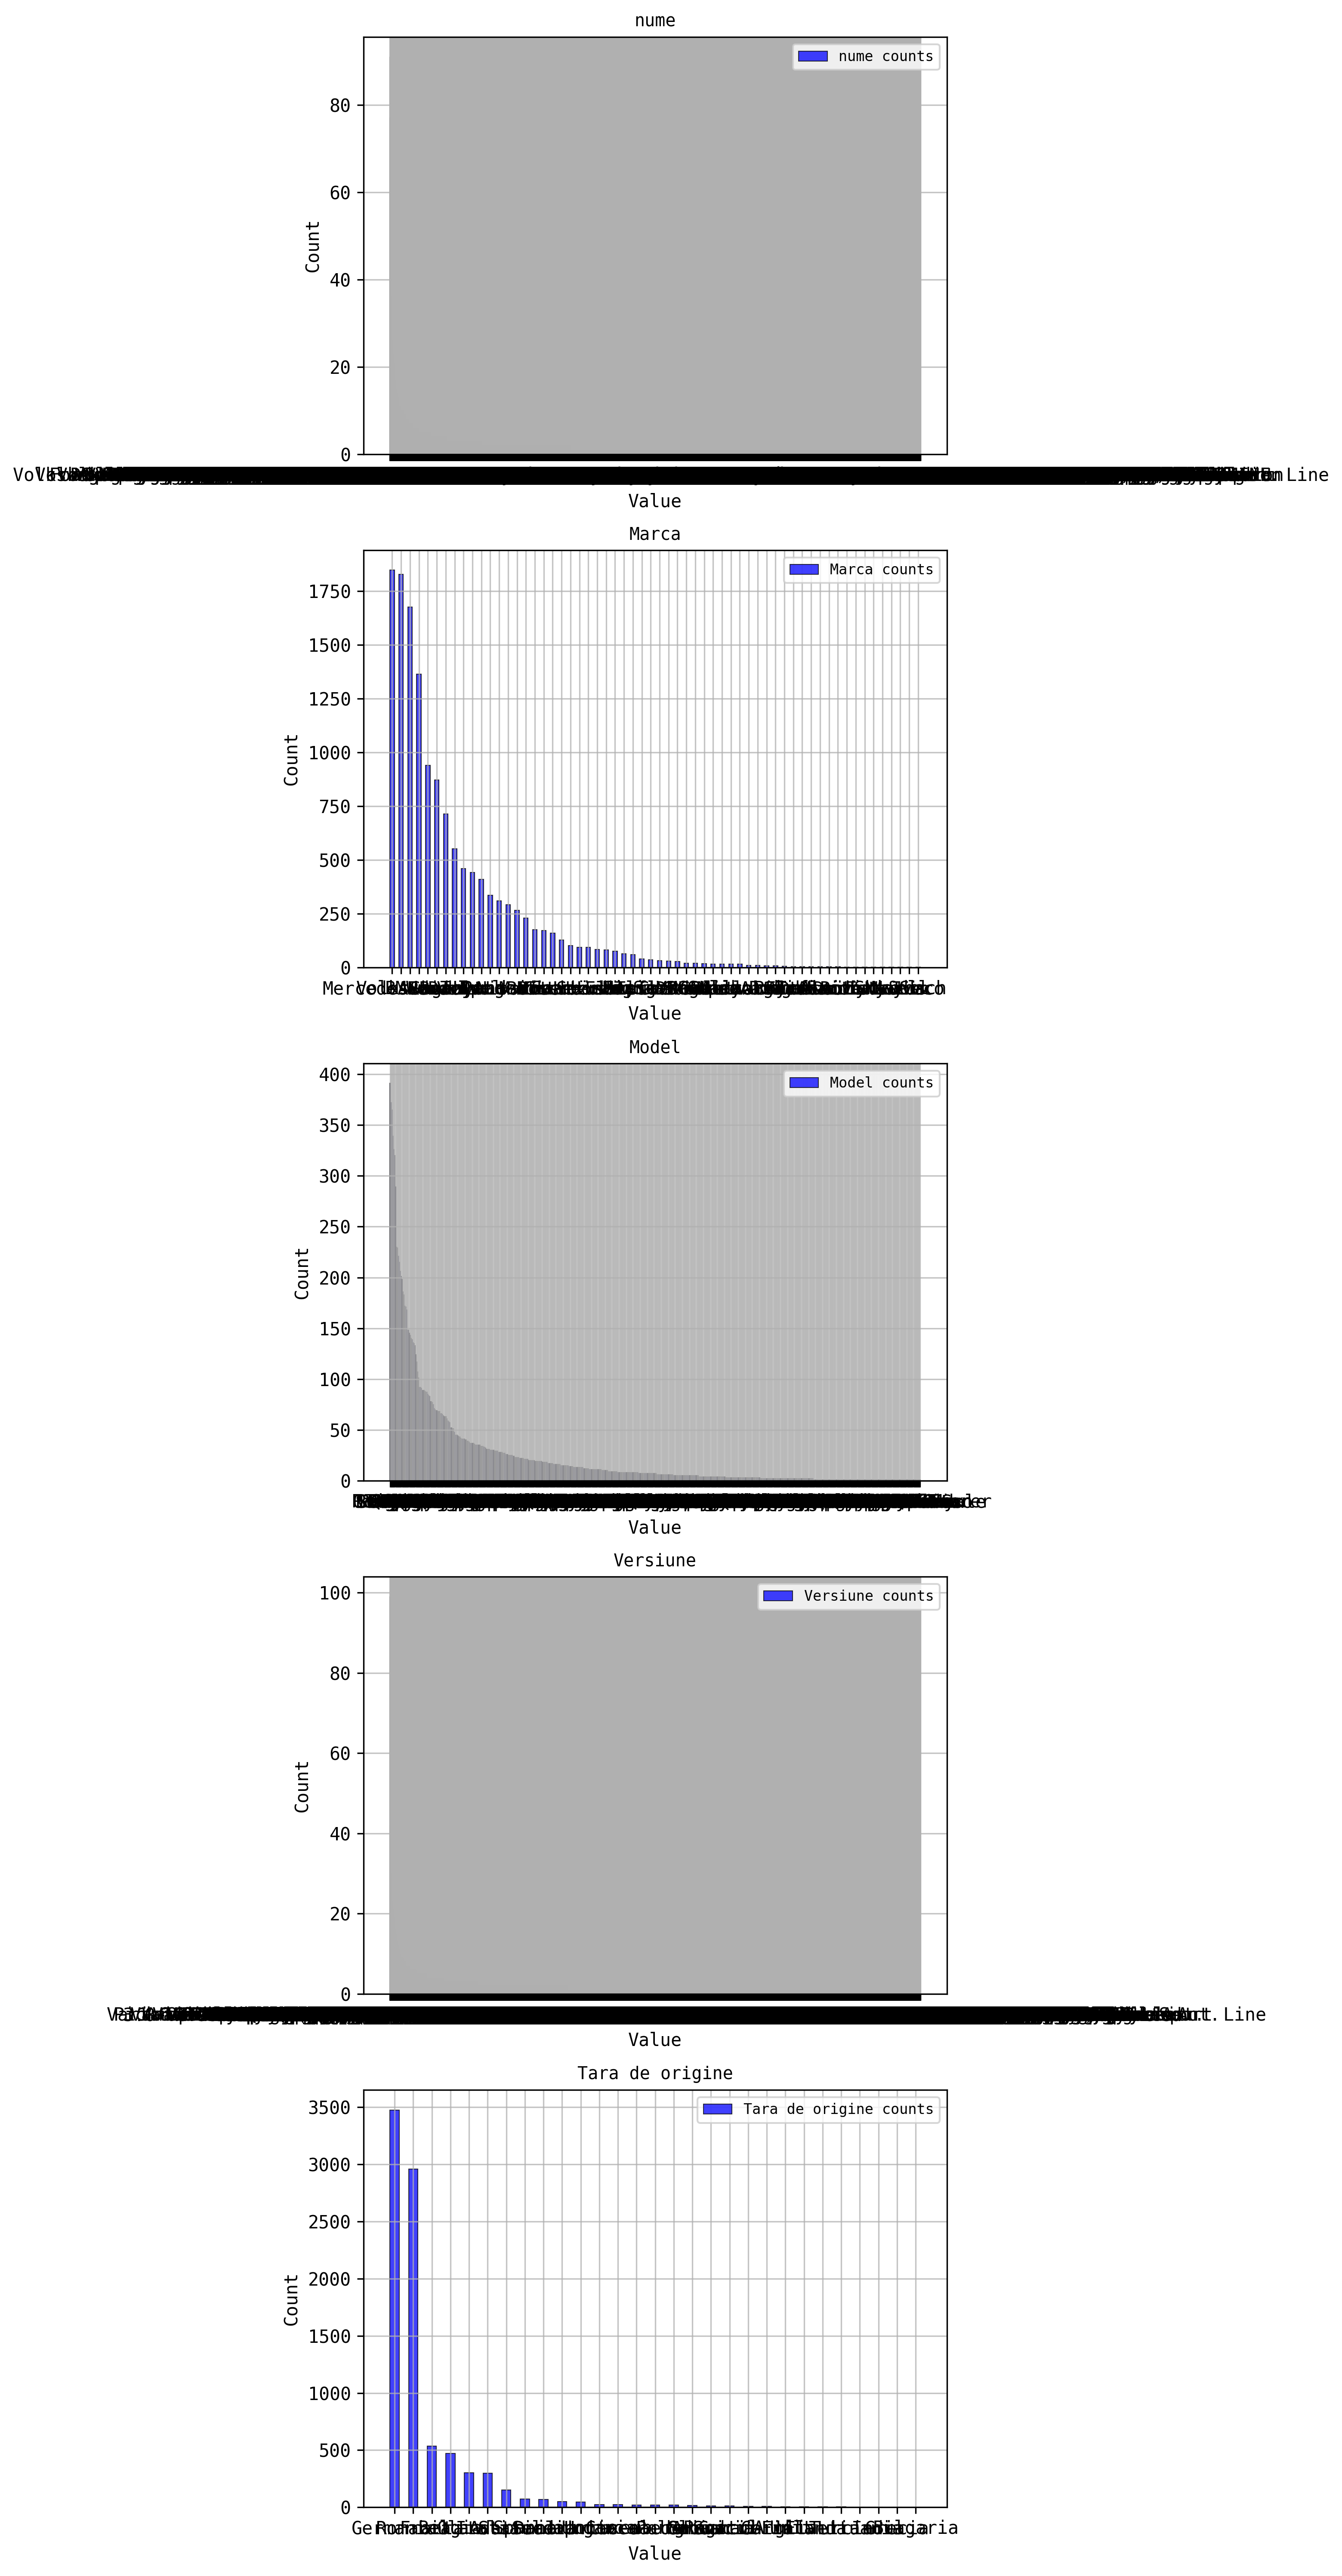

In [ ]:
cols = new_df.select_dtypes('object').columns

# o sa dureze un pic daca lasam comentata aceasta linie
# prima data am lasat totul sa ruleze pentru a-mi face o idee
#cols = np.random.choice(cols, 10, replace=True)

fig, ax = plt.subplots(5, 1, figsize=(10, 20), dpi=300)
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.size'] = 8
for idx, col in enumerate(cols):
  try:
    counts = new_df[col].value_counts()
    ax[idx].bar(counts.index, counts.values, alpha=0.75, label=f'{col} counts', color='blue', edgecolor='black', linewidth=0.5, width=0.5)
    ax[idx].set_title(col)
    ax[idx].set_ylabel('Count')
    ax[idx].set_xlabel('Value')
    ax[idx].grid(alpha=0.75)
    ax[idx].legend()
  except:
    print(f"ignore col {col}")
plt.tight_layout()
plt.show()

Afisam histograma cumulativa a pretului

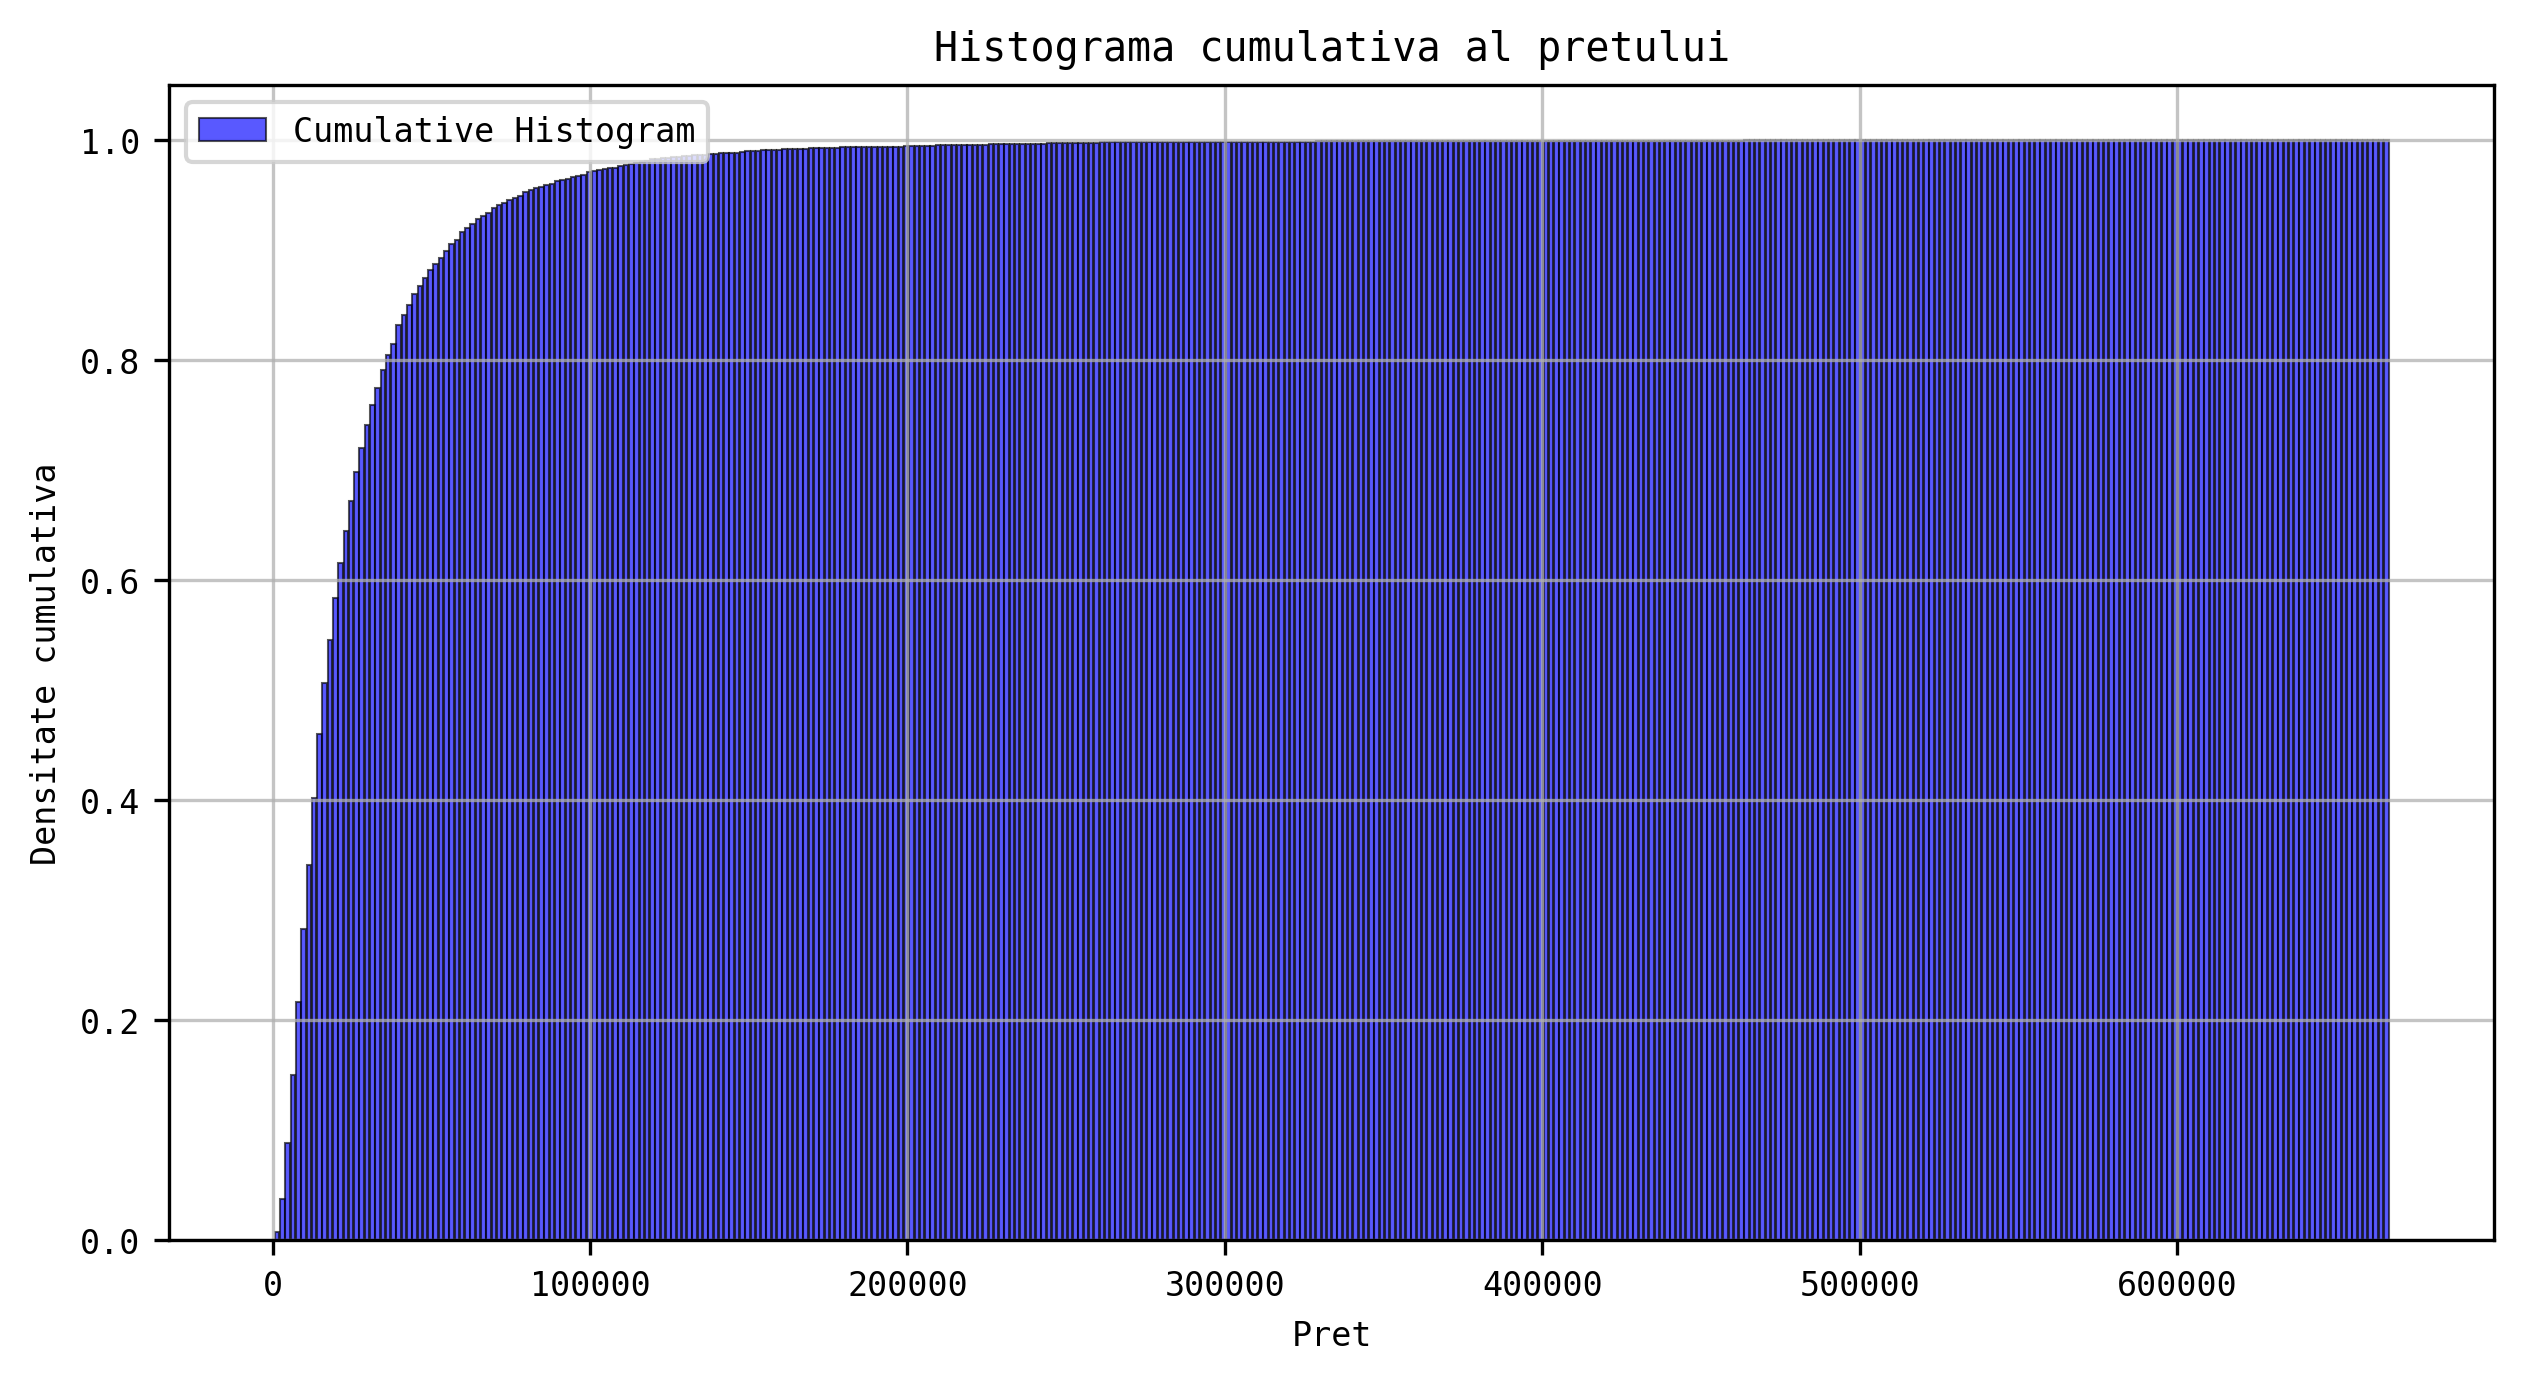

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=300)
plt.hist(new_df['pret'], bins=400, cumulative=True, density=True, alpha=0.65, label='Cumulative Histogram', color='blue', edgecolor='black', linewidth=0.5, rwidth=0.85)
plt.title('Histograma cumulativa al pretului')
plt.ylabel('Densitate cumulativa')
plt.xlabel('Pret')
plt.grid(alpha=0.75)
plt.legend()
plt.show()



---

Legat de pret, incercam sa vedem si cum sunt dispersate valoriile:

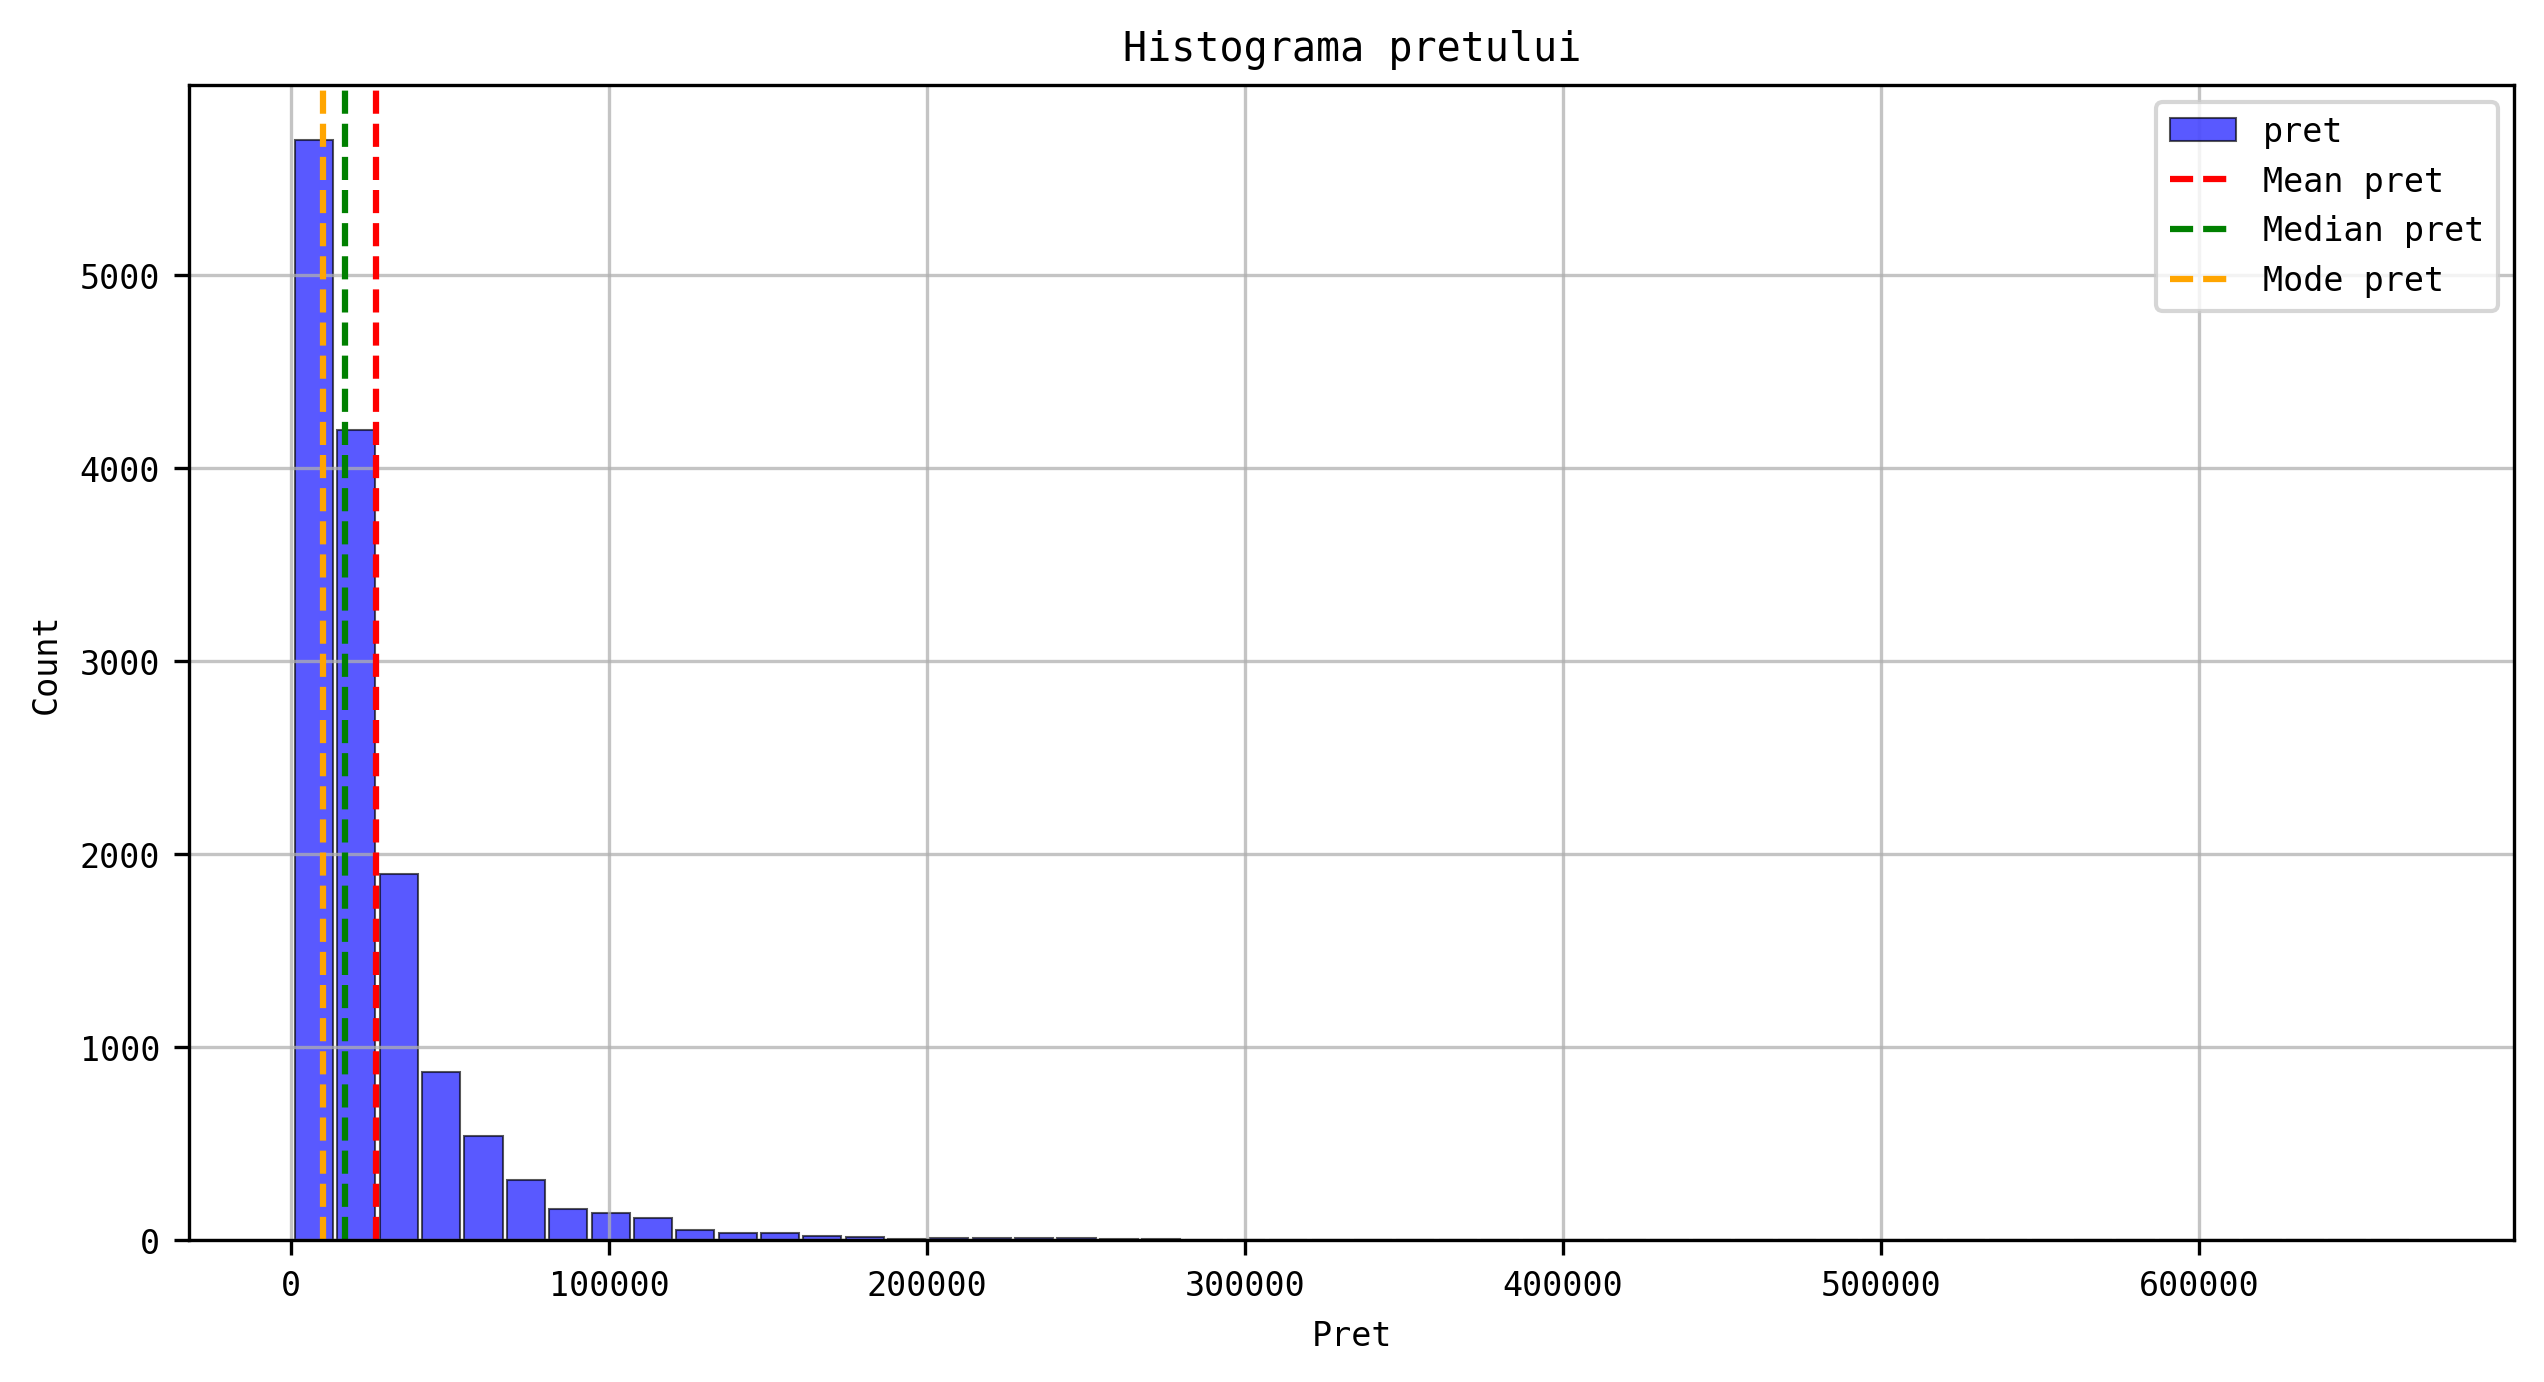

In [ ]:
# let's take a look at the histogram of `SalePrice`
fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=300)
plt.rcParams['font.family'] = 'monospace'
plt.hist(new_df['pret'], bins=50, alpha=0.65, color='blue', edgecolor='black', linewidth=0.5, label='pret', rwidth=0.9)
# add a vertical line at the mean
plt.axvline(new_df['pret'].mean(), color='red', linestyle='--', label='Mean pret')
# add a vertical line at the median
plt.axvline(new_df['pret'].median(), color='green', linestyle='--', label='Median pret')
# add a vertical line at the mode
plt.axvline(new_df['pret'].mode()[0], color='orange', linestyle='--', label='Mode pret')
plt.title('Histograma pretului')
plt.xlabel('Pret')
plt.ylabel('Count')
plt.grid(alpha=0.75)
plt.legend()


Se observa un trend descrescator al pretului, multe masini din setul de date avand un pret foarte mic, iar destul de putin trec peste 50000 de euro.

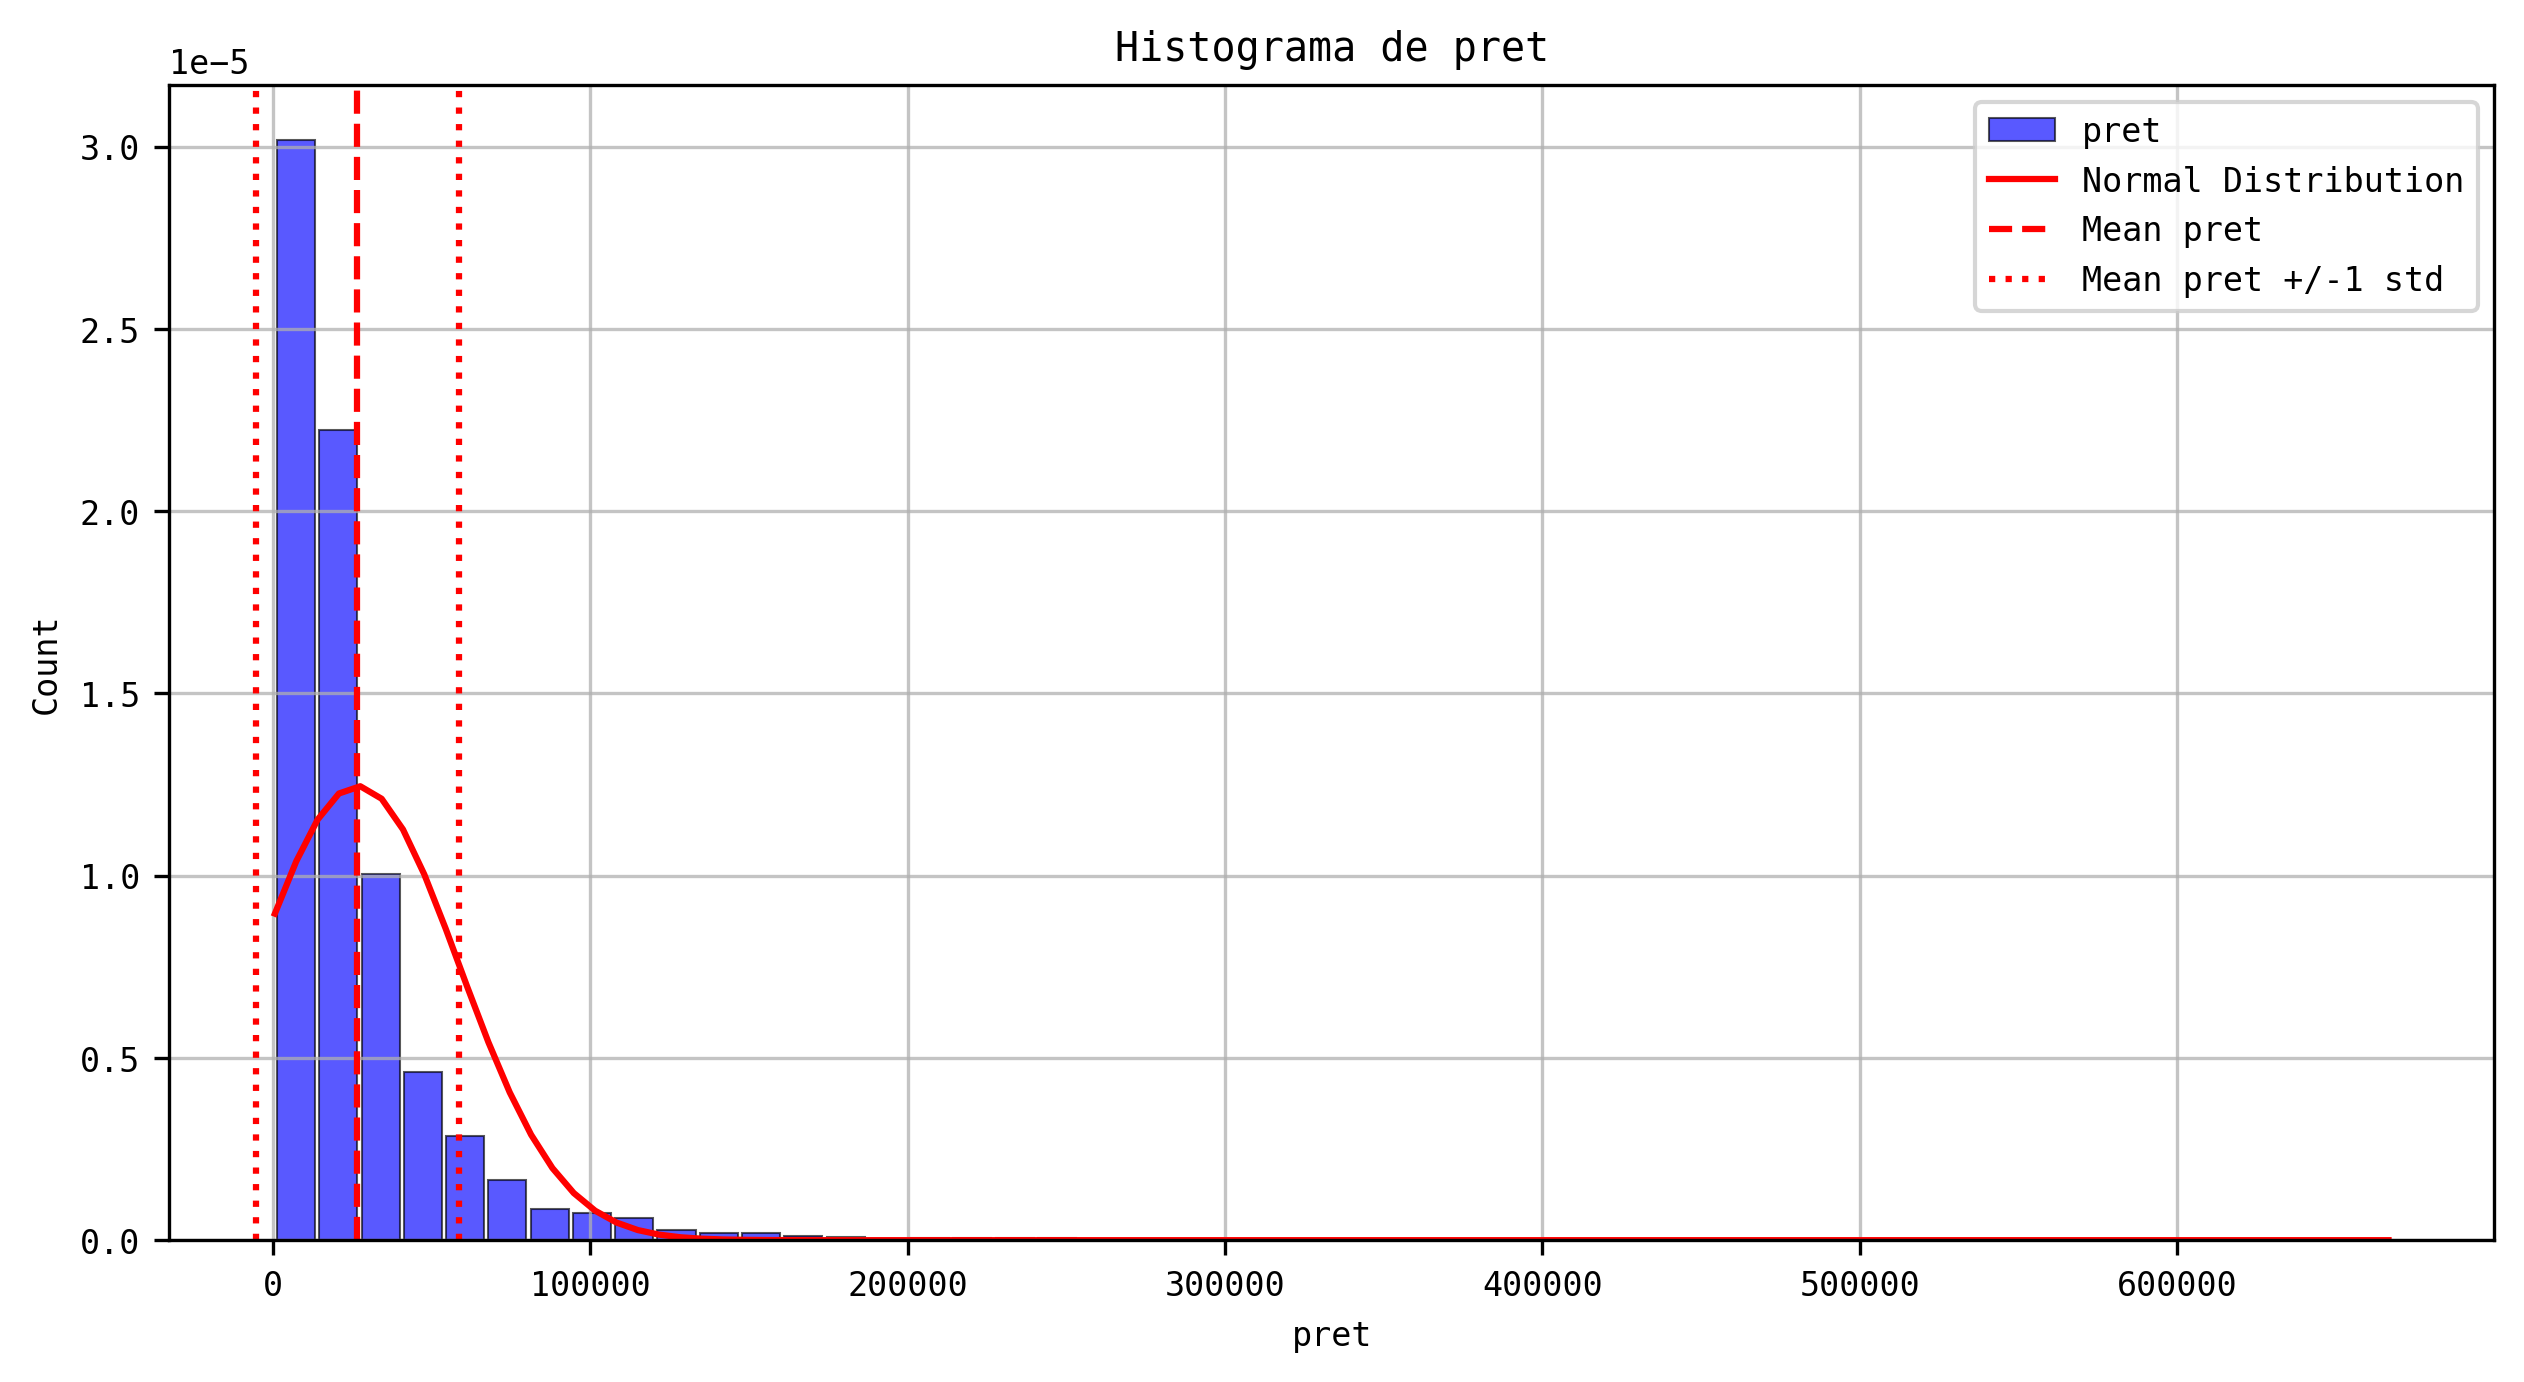

In [ ]:
import scipy.stats as stats

fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=300)
plt.rcParams['font.family'] = 'monospace'
plt.hist(new_df['pret'], bins=50, alpha=0.65, color='blue', edgecolor='black', linewidth=0.5, label='pret', rwidth=0.9, density=True)
x = np.linspace(new_df['pret'].min(), new_df['pret'].max(), 100)
y = stats.norm.pdf(x, new_df['pret'].mean(), new_df['pret'].std())
plt.plot(x, y, color='red', linestyle='-', label='Normal Distribution')
plt.axvline(new_df['pret'].mean(), color='red', linestyle='--', label='Mean pret')
plt.axvline(new_df['pret'].mean() + new_df['pret'].std(), color='red', linestyle='dotted', label='Mean pret +/-1 std')
plt.axvline(new_df['pret'].mean() - new_df['pret'].std(), color='red', linestyle='dotted')

plt.title('Histograma de pret')
plt.xlabel('pret')
plt.ylabel('Count')
plt.grid(alpha=0.75)
plt.legend()

Probabil va trebui fie o normalizare, fie o umplere a datelor artificial astfel incat sa obtinem un grafic mult mai ok.

Transformam ultimele coloane cu probleme in valori intregi (eliminam km/l/kWh, etc)

In [ ]:
def numericConvertor(col):
    col = col.str.replace(',', '.')
    col = col.str.extract(r'(\d+\.?\d*)')[0]

    return pd.to_numeric(col, errors='coerce')

col_selected = {
    "Autonomie",
    "Consum Mixt",
    "Valoare reziduala",
    "Timp de incarcare",
    "Valoare rata lunara",
    "Capacitate baterie",
    "Consum mediu",
    "Plata initiala (la predare)",
    "Garantie dealer (inclusa in pret)"
}

for col in col_selected:
    if col in new_df.columns:
        new_df[col] = numericConvertor(new_df[col])

new_df = new_df.rename(columns={
    "Autonomie": "Autonomie (km)",
    "Consum Mixt": "Consum Mixt (l/100km)",
    "Valoare reziduala": "Valoare reziduala (EUR)",
    "Timp de incarcare": "Timp de incarcare (h)",
    "Valoare rata lunara": "Valoare rata lunara (EUR)",
    "Capacitate baterie": "Capacitate baterie (kWh)",
    "Consum mediu": "Consum mediu (kWh/100km)",
    "Plata initiala (la predare)": "Plata initiala (la predare) (EUR)",
    "Garantie dealer (inclusa in pret)": "Garantie dealer (inclusa in pret) (luni)"
})

new_df.columns


Index(['nume', 'pret', 'Marca', 'Model', 'Versiune', 'Anul fabricației', 'Km',
       'Combustibil', 'Putere', 'Capacitate cilindrica', 'Transmisie',
       'Consum Extraurban', 'Cutie de viteze', 'Consum Urban', 'Tip Caroserie',
       'Emisii CO2', 'Numar de portiere', 'Culoare', 'Numar locuri',
       'sau in limita a', 'Garantie dealer (inclusa in pret) (luni)', 'Stare',
       'Audio si tehnologie', 'Confort si echipamente optionale',
       'Electronice si sisteme de asistenta', 'Siguranta', 'Norma de poluare',
       'Tara de origine', 'Performanta', 'Vehicule electrice',
       'Plata initiala (la predare) (EUR)', 'Autonomie (km)',
       'Consum mediu (kWh/100km)', 'Capacitate baterie (kWh)',
       'Valoare rata lunara (EUR)', 'Timp de incarcare (h)',
       'Numar de rate lunare ramase', 'Valoare reziduala (EUR)',
       'Consum Mixt (l/100km)'],
      dtype='object')

Afisam corelatiile dintre elemente, pentru a vedea ce coloana influenteaza pe care. In felul acesta, am putea decide ce coloane pot fi eliminate, deoarece nu isi au rostul. (de retinut faptul ca codul de mai jos elimina singur coloanele ce nu au corelatii deloc sau corelatii mai mici de 0.4)

In [ ]:
import seaborn as sns

In [ ]:
new_df_numeric = new_df.select_dtypes(include=['int', 'float'])

corr_df = new_df_numeric.corr()
plt.rcParams['font.family'] = 'monospace'

plt.figure(figsize=(30, 30), dpi=500)

corr_df = corr_df - np.diag(np.diag(corr_df))

# Filtrăm pentru a păstra doar valorile de corelație mai mari de 0.4
corr_df = corr_df[corr_df > 0.4]

corr_df = corr_df.dropna(axis=0, how='all').dropna(axis=1, how='all')
sns.heatmap(corr_df, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5, linecolor='black', square=False, cbar=True, cbar_kws={'orientation': 'vertical', 'shrink': 0.8, 'pad': 0.05})
plt.title('Pearson Correlation Matrix for Numeric Columns', fontsize=20)
plt.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

Afisam cele trei tipuri de heatmap de corelatie (pearson, kendall si spearman)

In [ ]:
df_numeric = new_df.select_dtypes(include=['int', 'float'])
fig, ax = plt.subplots(1, 3, figsize=(30, 10), dpi=500)

plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.size'] = 8

for i, corr_type in enumerate(['pearson', 'kendall', 'spearman']):
  corr_df = df_numeric.corr(method=corr_type)
  corr_df = corr_df - np.diag(np.diag(corr_df))
  corr_df = corr_df[corr_df > 0.4]
  corr_df = corr_df.dropna(axis=0, how='all').dropna(axis=1, how='all')

  sns.heatmap(corr_df, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5, linecolor='black', square=False, cbar=True, cbar_kws={'orientation': 'vertical', 'shrink': 0.8, 'pad': 0.05}, ax=ax[i], mask=corr_df.isnull())

  ax[i].set_title(f'{corr_type.capitalize()} Correlation', fontsize=20)

plt.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

O analiza detaliata a ceea ce trebuie eliminat dintre aceste coloane ar fi in cazul in care dorim sa facem anumite predictii pentru o anumita caracteristica a unui vehicul. Deocamdata, putem lasa asa setul de date.